# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.2.2 yellowbrick==1.5 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Setting the float display format to show numbers in standard decimal notation
pd.set_option('display.float_format', '{:.2f}'.format)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
# Reading datasets provided by Trade & Ahead by using read_csv from pandas package
trade_ahead_main_df = pd.read_csv("/content/sample_data/stock_data.csv")

# copying the data to another variable to avoid any changes to original data
trade_ahead_cp_df = trade_ahead_main_df.copy()

## Data Overview

The initial steps conducted to get an overview of any dataset is to:
- View the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Check the shape of the dataset to get information about the number of rows and columns in the dataset
- Obtain information about the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying few rows of the dataset

In [23]:
# viewing a random sample of the dataset provided by Trade & Ahead
trade_ahead_cp_df.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


**Observations**

* The dataset contains data on stock prices and several financial indicators for a few companies listed under the New York Stock Exchange, including key attributes such as current price, price change, volatility, return on equity (ROE), cash ratio, net cash flow, net income, earnings per share, and valuation ratios like P/E and P/B ratios. This information is crucial for grouping the stocks based on their financial characteristics and providing insights into the composition of each group.

* A preliminary look at the head and tail of the dataset suggests there are no missing values. However, to confirm the dataset is complete across all rows and columns, a full check for missing values will be performed  to ensure data quality.

* The dataset contains numerical features with varying magnitudes, such as net cash flow, net income, and estimated shares outstanding, which are significantly larger compared to other attributes like ROE and cash ratio. To ensure fair clustering and prevent larger values from dominating the analysis, appropriate scaling techniques such as normalization or standardization will be considered.

* A preliminary look at the head and tail of the dataset suggests there are no missing values. However, to confirm the dataset is complete across all rows and columns, a full check for missing values will be performed to ensure data quality.

### Understanding the shape of the dataset.

In [24]:
# checking shape of the data
print(f"There are {trade_ahead_cp_df.shape[0]} rows and {trade_ahead_cp_df.shape[1]} columns.") ## Complete the code to get the shape of data


There are 340 rows and 15 columns.


**Observations**

* The dataset has 340 rows and 15 columns of data

### Checking the data types of the columns for the dataset

In [25]:
trade_ahead_cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observations**

* A preliminary inspection indicates that there are no null values in the dataset. However, an explicit check for missing values will be conducted to ensure data completeness and quality.
* There are 11 numerical columns ( 4 Integers and 7 Floats ) and 4 object type columns.
* The dataset occupies about 40 KB, which is quite manageable in terms of performance.


### Checking for duplicates and missing values

**Checking for Missing Values**

In [28]:
print(trade_ahead_cp_df.isnull().sum())

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64


**Checking for Duplicates**

In [29]:
print(trade_ahead_cp_df.duplicated().sum())

0


**Observations**

* There are no missing values and duplicates

### Checking Statistical Summary of the dataset

In [32]:
trade_ahead_cp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.00,80.86,98.06,4.50,38.55,59.70,92.88,1274.95
Price Change,340.00,4.08,12.01,-47.13,-0.94,4.82,10.70,55.05
Volatility,340.00,1.53,0.59,0.73,1.13,1.39,1.70,4.58
ROE,340.00,39.60,96.55,1.00,9.75,15.00,27.00,917.00
Cash Ratio,340.00,70.02,90.42,0.00,18.00,47.00,99.00,958.00
Net Cash Flow,340.00,55537620.59,1946365312.18,-11208000000.00,-193906500.00,2098000.00,169810750.00,20764000000.00
Net Income,340.00,1494384602.94,3940150279.33,-23528000000.00,352301250.00,707336000.00,1899000000.00,24442000000.00
Earnings Per Share,340.00,2.78,6.59,-61.20,1.56,2.90,4.62,50.09
Estimated Shares Outstanding,340.00,577028337.75,845849595.42,27672156.86,158848216.10,309675137.80,573117457.32,6159292035.00
P/E Ratio,340.00,32.61,44.35,2.94,15.04,20.82,31.76,528.04


**Observations**

1. Current Price:
 * The stock prices range from \\$4.50 to \\$1274.95, with an average of \\$80.86, indicating a diverse mix of stock values.
 * The standard deviation of \$98.06 suggests a wide variation in stock prices.
 * Since the mean ( \\$80.86 ) is higher than the median (\\$59.70), the distribution is likely right-skewed, meaning a few high-value stocks are pulling the average upward.

2. Price Change:
 * Stock prices have changed within a range of -47.13 to 55.05, with a median change of 4.82, showing substantial fluctuations.
 * The standard deviation of 12.01 indicates variability in stock price movements.
 * The mean (4.08) is lower than the median (4.82), suggesting a left-skew, with more frequent smaller gains and fewer larger losses

3. Volatility:
 * Volatility ranges between 0.73 and 4.58, with an average of 1.53, implying that some stocks are relatively stable while others fluctuate more.
 * A standard deviation of 0.59 shows moderate spread across the dataset.
 * Since the mean (1.53) is higher than the median (1.38), the data may be right-skewed, with a few highly volatile stocks driving the average up.


4. ROE (Return on Equity):
 * ROE values range from 1.00 to 917.00, with an average of 39.60, suggesting some companies have exceptionally high profitability.
 * A standard deviation of 96.55 highlights large disparities in financial performance.
 * The mean (39.60) is much higher than the median (15.00), indicating a right-skewed distribution, suggesting the presence of highly profitable companies.


5. Cash Ratio:
 * The cash ratio varies from 0.00 to 958.00, with a median value of 47.00, indicating varying liquidity levels.
 * A standard deviation of 90.42 highlights significant differences across companies.
 * The mean (70.02) is higher than the median (47.00), implying a right-skew, with a few companies having much higher cash reserves.


6. Net Cash Flow:
 * Net cash flow ranges from -11.21 billion to 20.76 billion, with an average of $55.54 million, highlighting substantial differences in cash movements.
 * The standard deviation of $1.95 billion suggests a wide spread across companies.
 * The mean (\\$55.54 million) is much higher than the median (\\$2.10 million), indicating a right-skewed distribution due to a few companies with extremely high cash flows.

7. Net Income:
 * Net income ranges from -23.53 billion to 24.44 billion, with an average of \\$1.49 billion, reflecting diverse profitability.
 * A standard deviation of \\$3.94 billion shows large variability among companies.
 * The mean (\\$1.49 billion) is higher than the median (\\$0.71 billion), suggesting a right-skewed distribution, indicating a few highly profitable companies.

8. Earnings Per Share (EPS):
 * EPS values range from -61.20 to 50.09, with an average of 2.78, showing a significant variation in per-share earnings.
 * A standard deviation of 6.59 suggests notable differences across companies.
 * The mean (2.78) is higher than the median (2.90), suggesting a slight left-skew, meaning a few low EPS values pull the mean down.

9. Estimated Shares Outstanding:
 * Estimated shares outstanding range from 27.67 million to 6.16 billion, with an average of 577.03 million, showing substantial differences in company sizes.
 * A standard deviation of 845.85 million suggests a large spread.
 * Since the mean (577.03 million) is higher than the median (309.68 million), the data is right-skewed, indicating some companies have an exceptionally high number of outstanding shares.

10. P/E Ratio (Price-to-Earnings Ratio):
 * P/E ratios range from 2.94 to 528.04, with an average of 32.61, indicating valuation differences.
 * A standard deviation of 44.35 highlights a broad spread.
 * Since the mean (32.61) is higher than the median (20.82), the data appears to be right-skewed, with a few companies having extremely high P/E ratios.

11. P/B Ratio (Price-to-Book Ratio)
 * P/B ratios range from -76.11 to 129.06, with an average of -1.72, reflecting varying valuations and some negative values.
 * A standard deviation of 13.97 suggests substantial variation in book valuations.
 * The mean (-1.72) is lower than the median (-1.06), suggesting a left-skew, indicating some companies have very low or negative book values pulling the mean down.

In [34]:
trade_ahead_cp_df.describe(include=['object']).T

,count,unique,top,freq
Ticker Symbol,340,340,AAL,1
Security,340,340,American Airlines Group,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


**Observations**

* There are 11 unique sectors, suggesting a well-distributed dataset across various industries.
* The most common sector is "Industrials", appearing 53 times, indicating a higher representation of industrial companies in the dataset.
* The dataset contains 104 unique sub-industries, representing a wide variety of market segments.
* The most common sub-industry is "Oil & Gas Exploration & Production", with 16 occurrences, showing a notable presence in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Defining Functions that will help with EDA

In [47]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [50]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Checking the Categorical variables

In [45]:
# Select categorical column names
cols_cat = trade_ahead_cp_df.select_dtypes(['object']).columns.tolist()

# Remove the first and second columns - Ticker Symbol and Security
cols_cat = cols_cat[2:]

# Loop through the remaining categorical columns
for i in cols_cat:
    print('Unique values in',i, 'are :')
    print(trade_ahead_cp_df[i].value_counts())
    print('*'*50)

Unique values in GICS Sector are :
GICS Sector
Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: count, dtype: int64
**************************************************
Unique values in GICS Sub Industry are :
GICS Sub Industry
Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & 

**Observations**

* The most common sub-industry is "Oil & Gas Exploration & Production", with 16 occurrences, followed by REITs and Industrial Conglomerates, each with 14 occurrences.

* The most common sector is "Industrials", appearing 53 times, followed by Financials with 49 appearances. The "Telecommunications Services" has the least no of companies with 5 appearances.


### Checking Uniqueness Using Security (Company Name)

In [46]:
# checking the number of unique values
trade_ahead_cp_df["Security"].nunique()

340

**Observations**

There are 340 unique companies with stocks listed on the New York exchange

### Univariate Analysis

#### Univariate Analysis for Numerical Columns

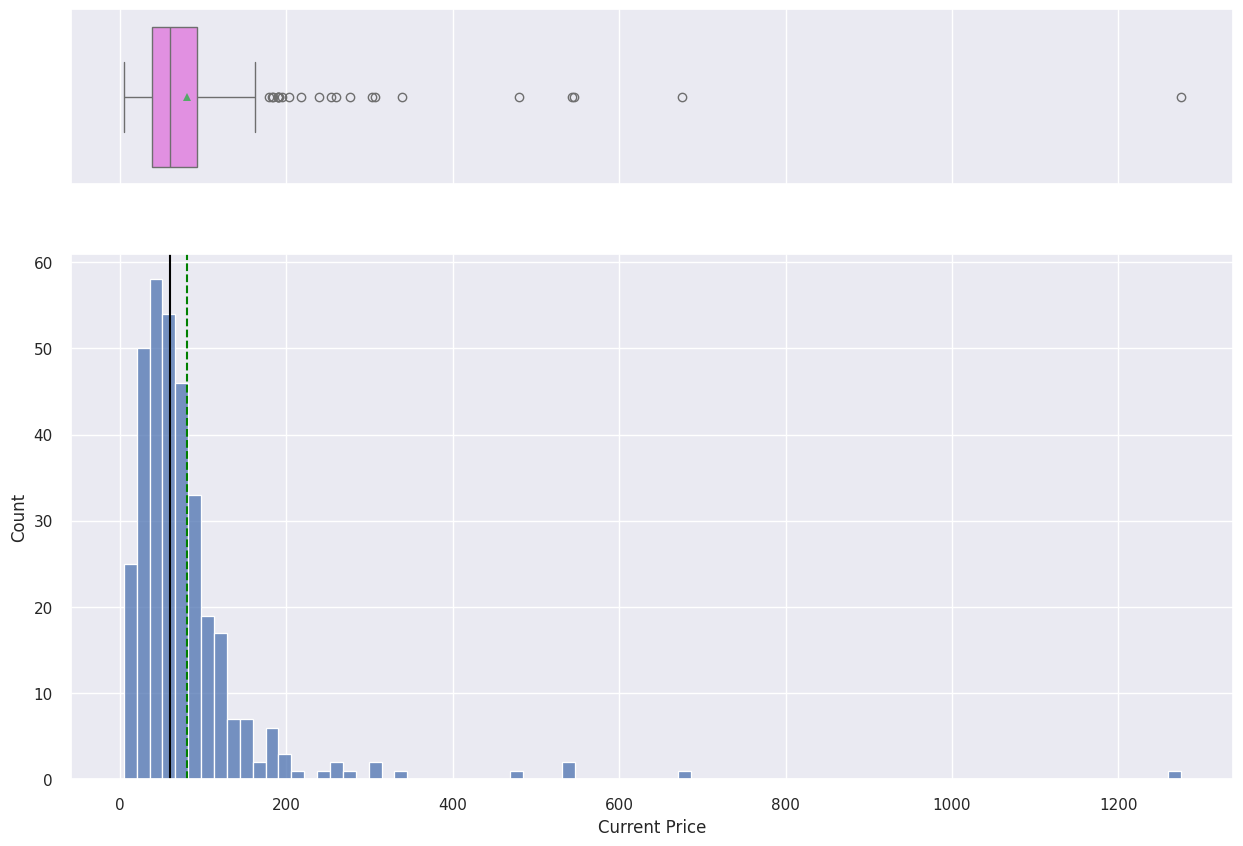

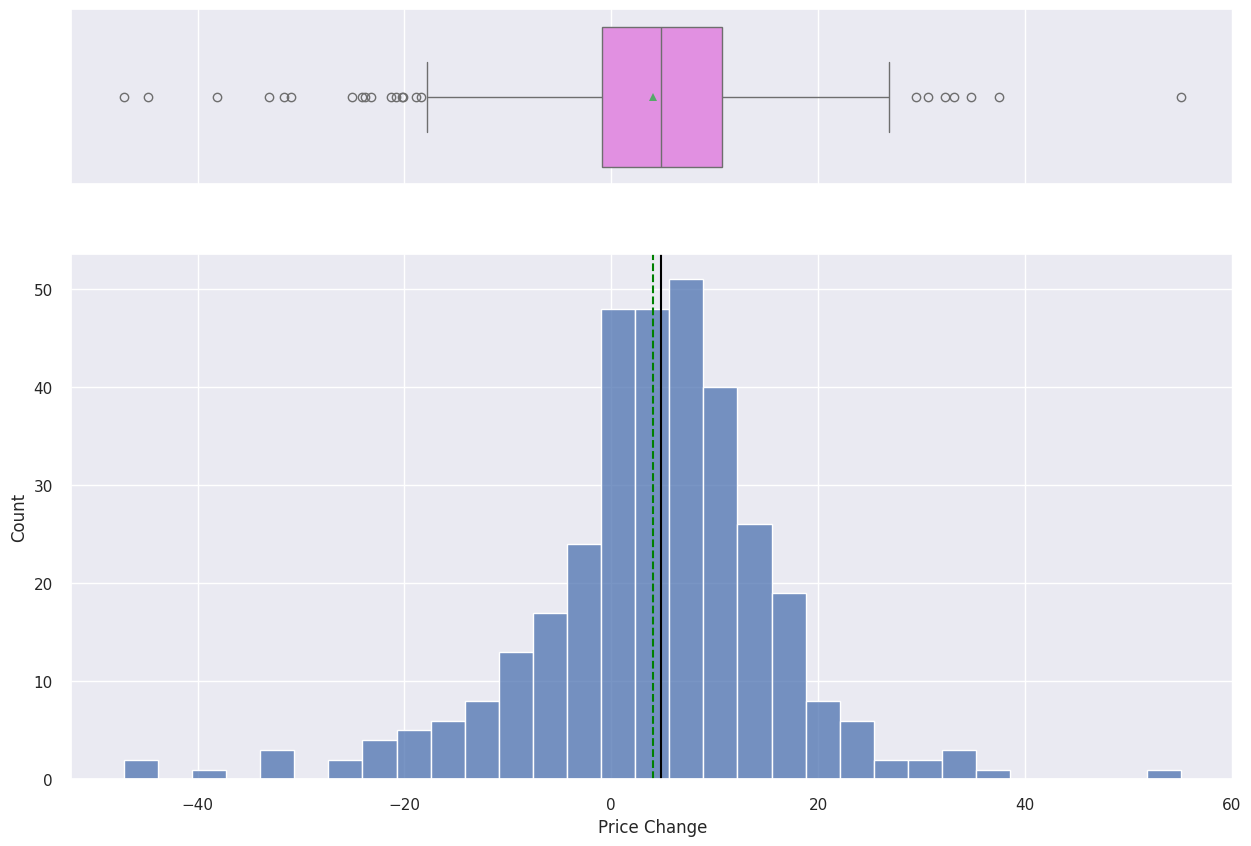

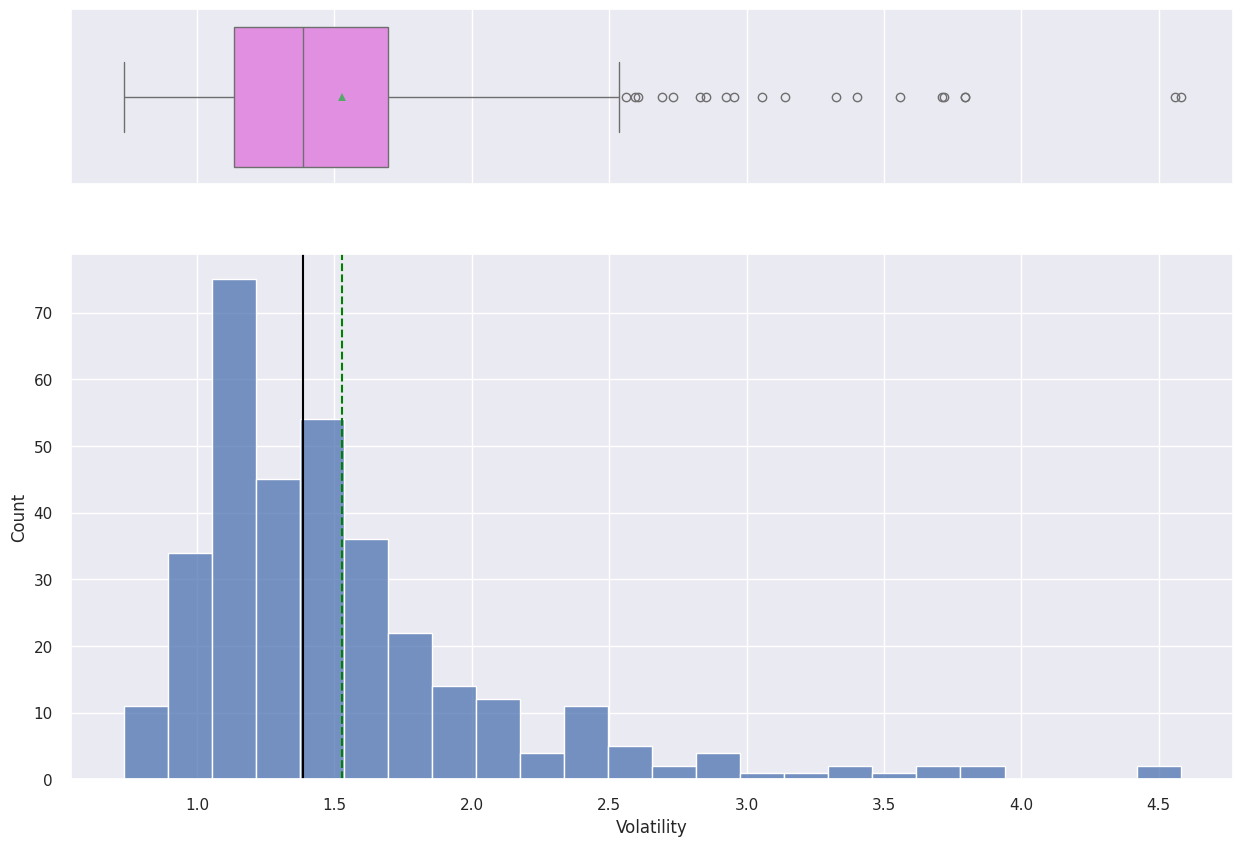

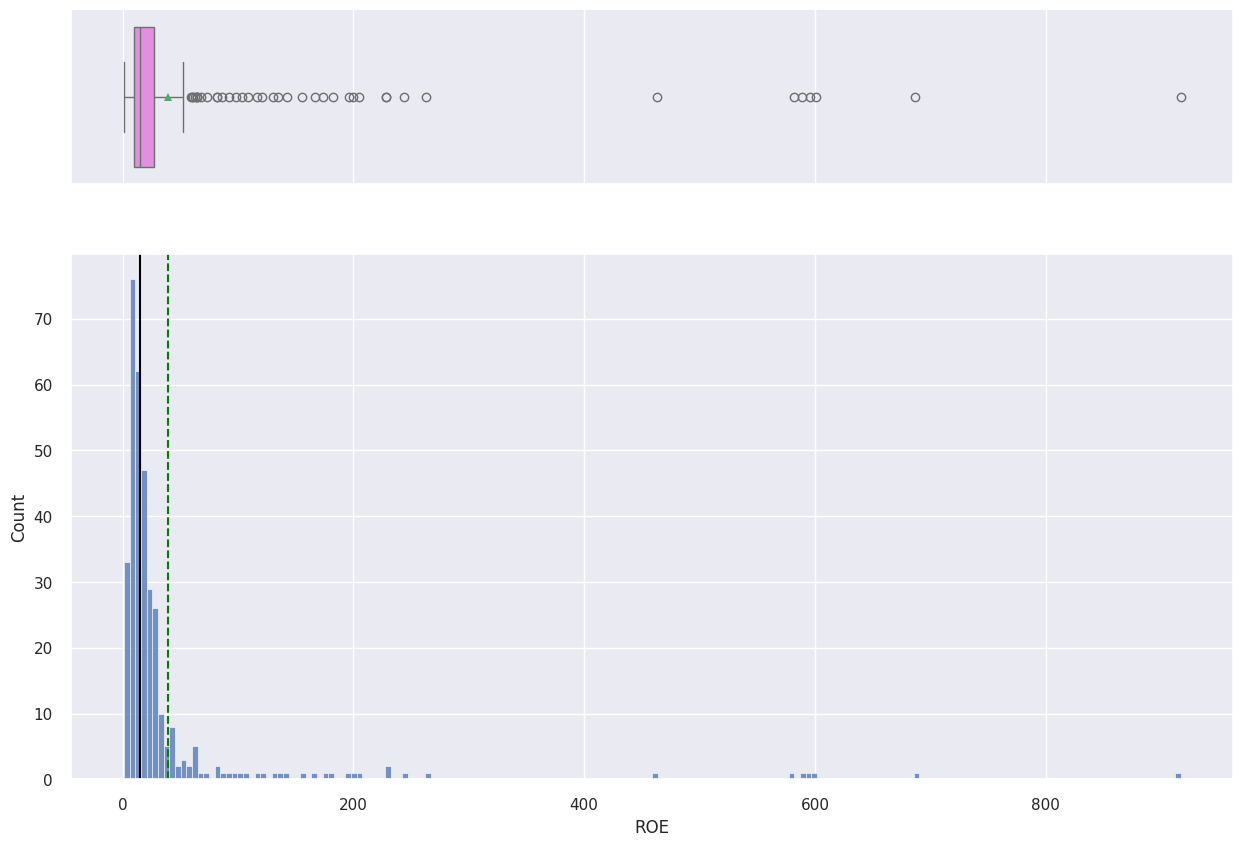

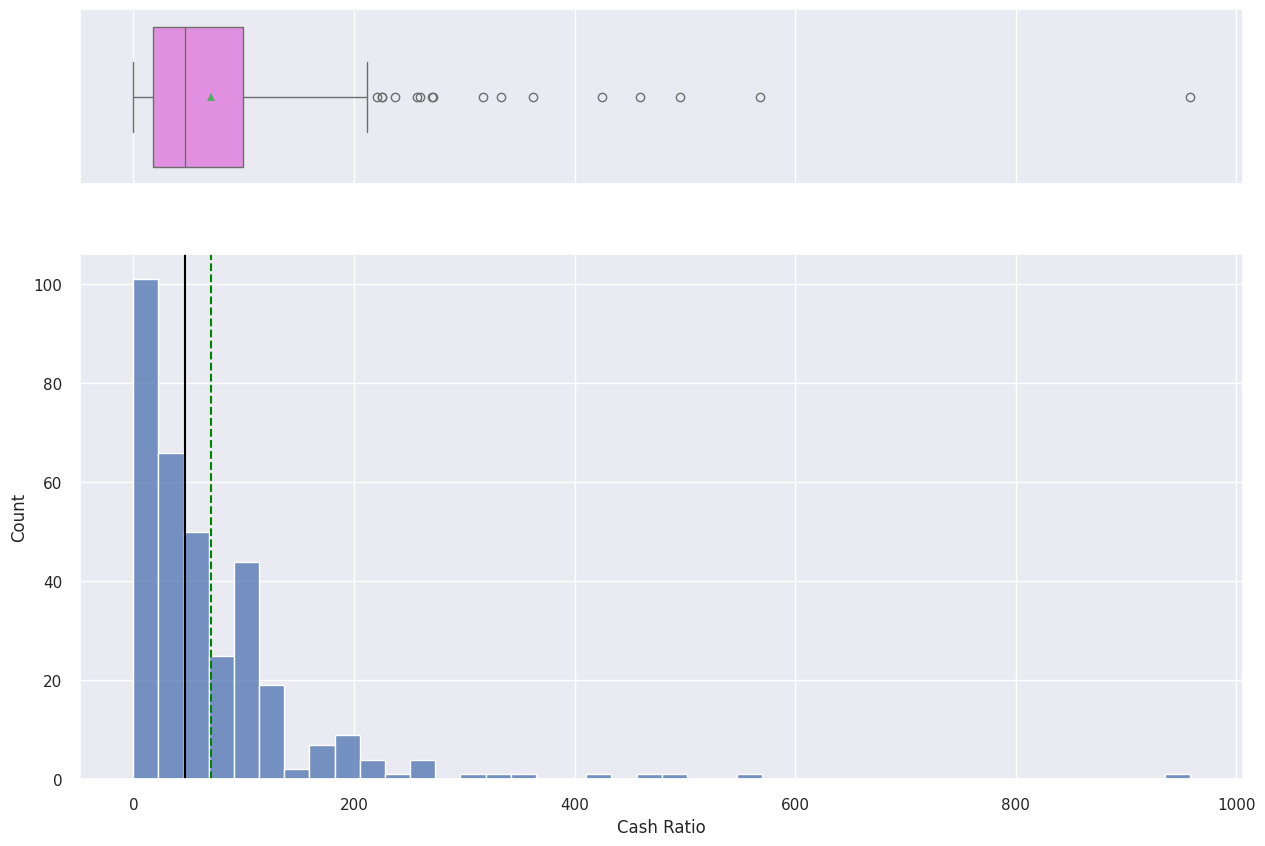

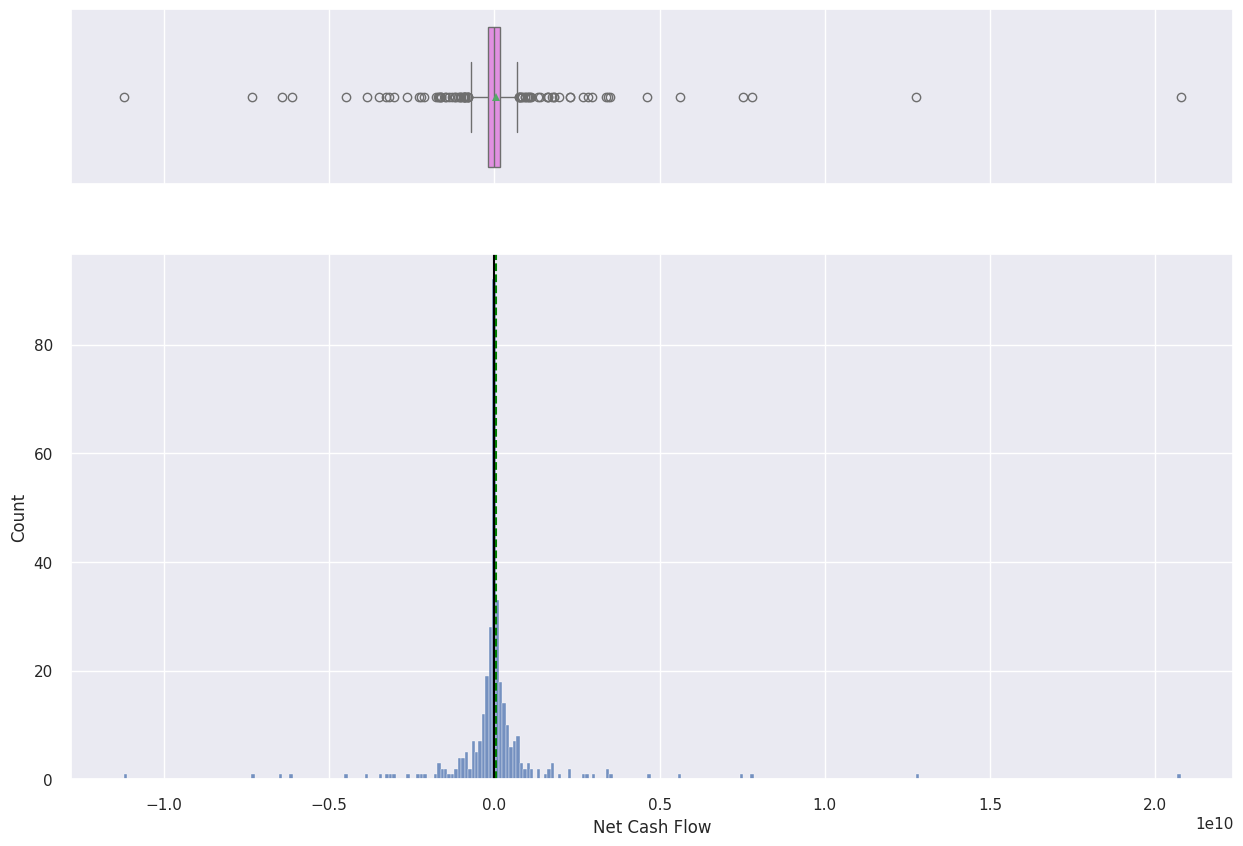

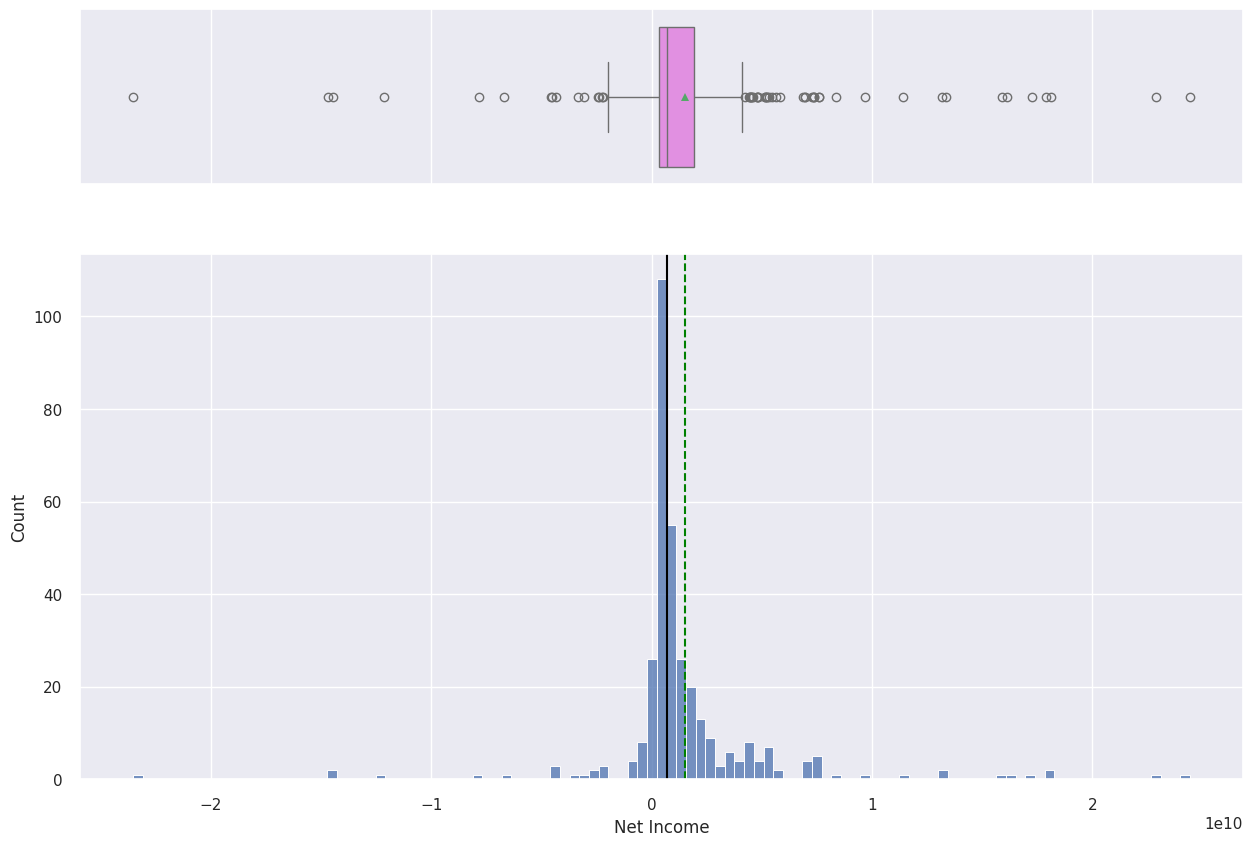

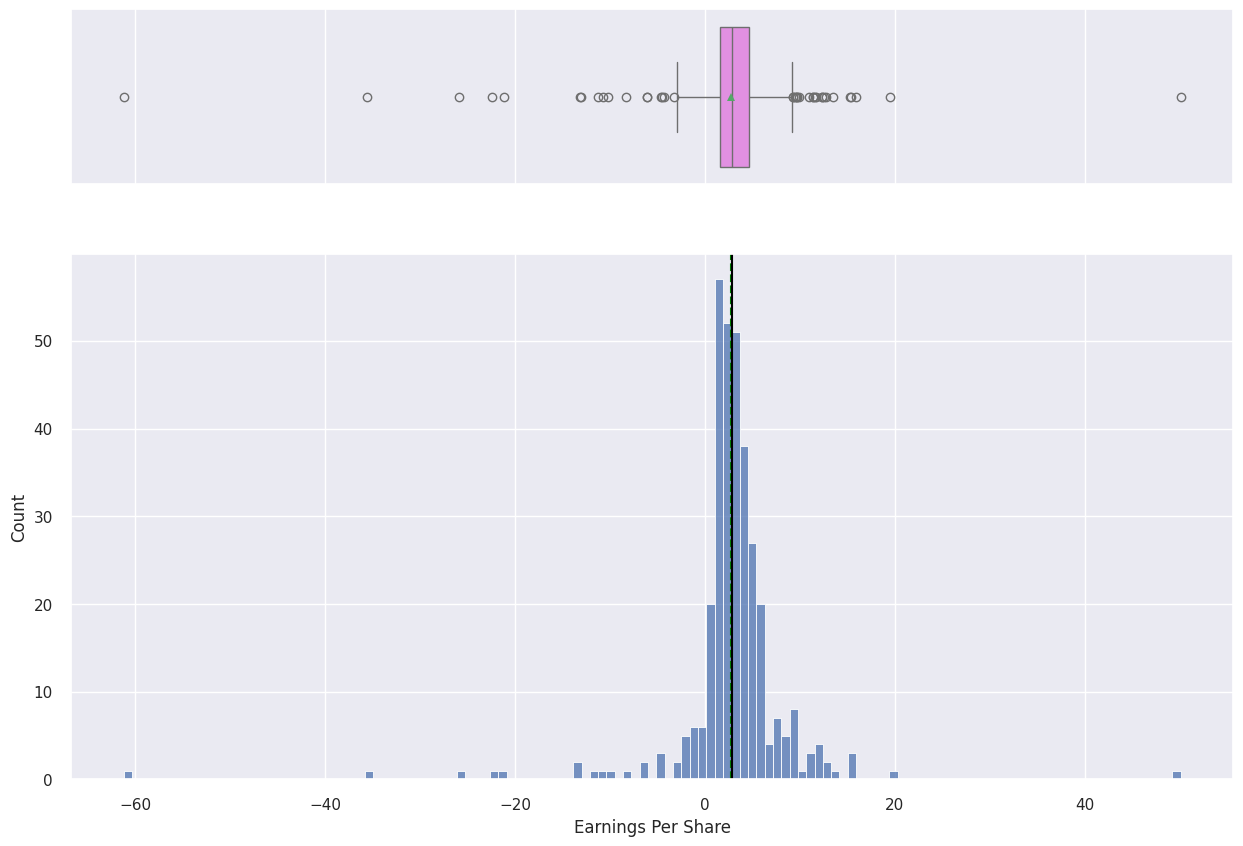

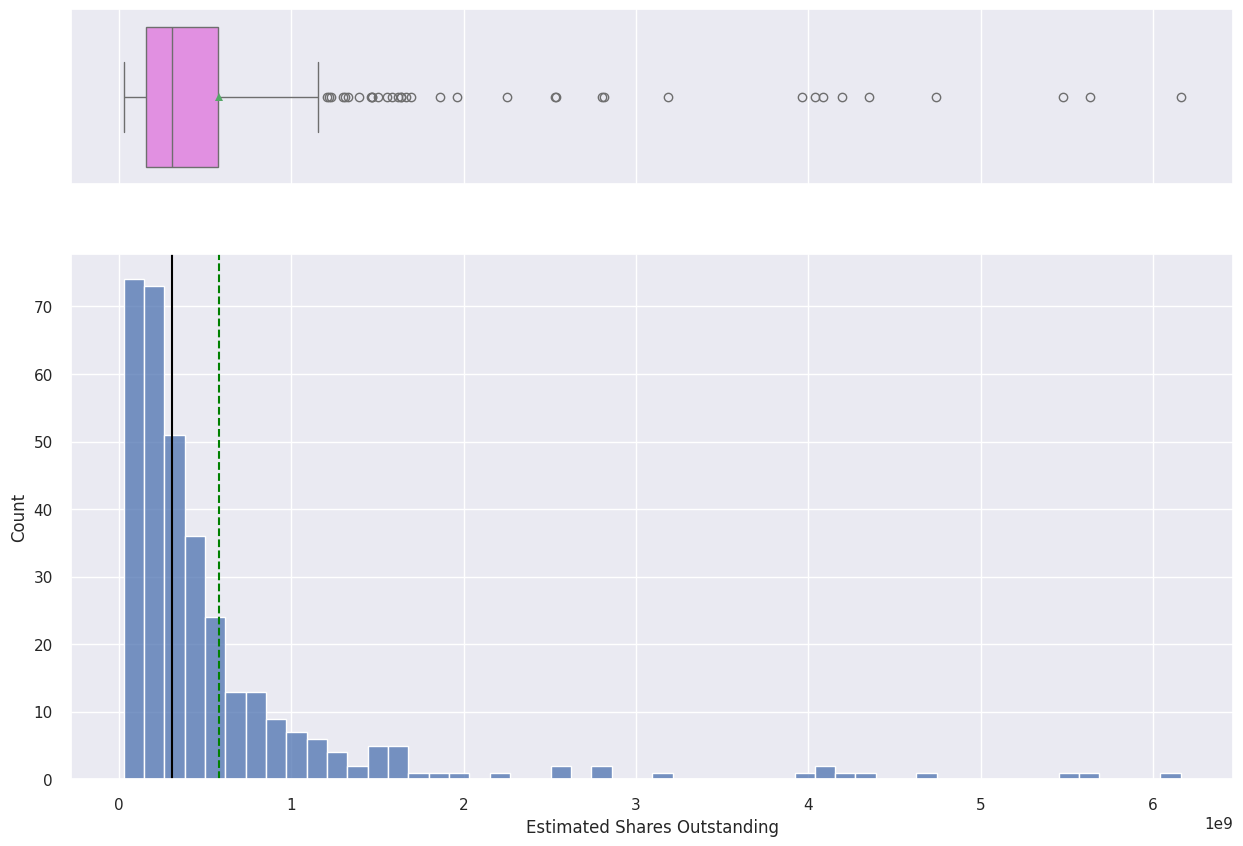

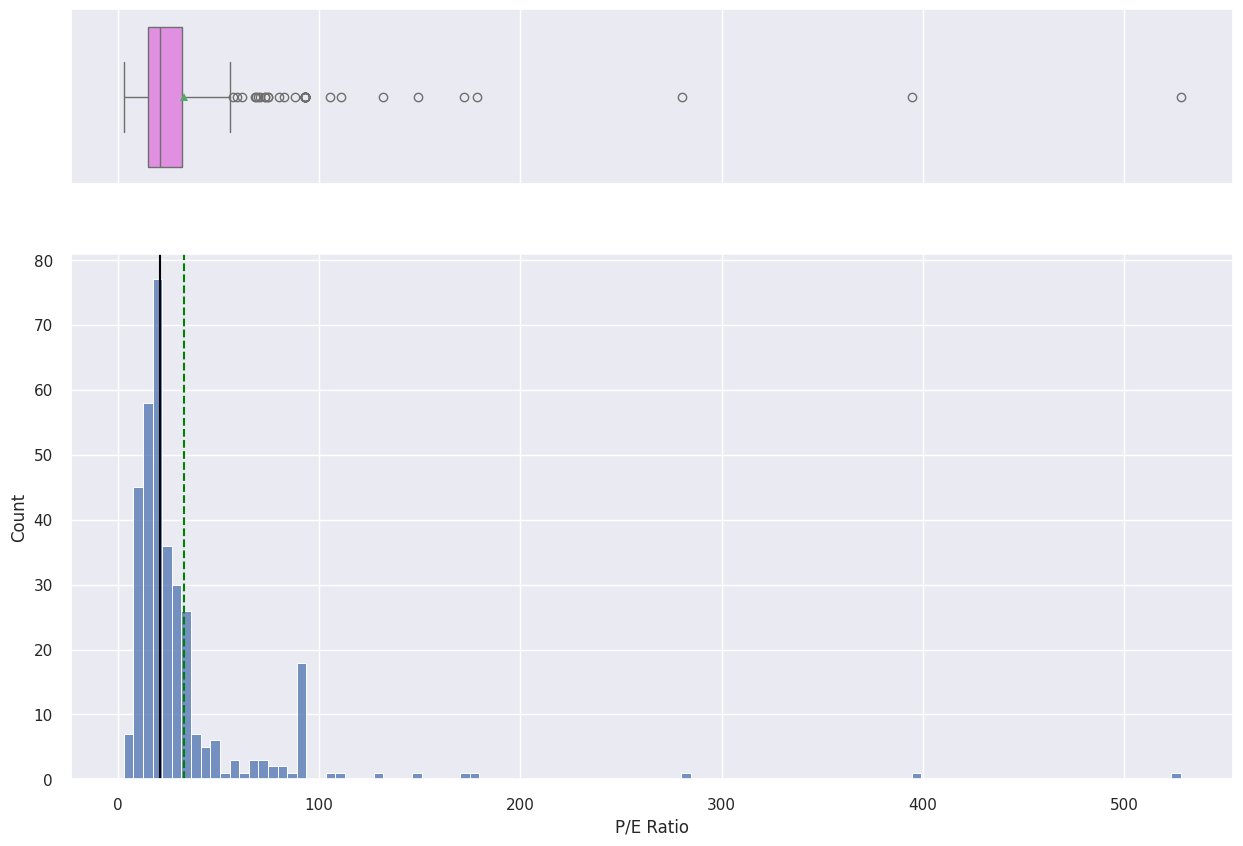

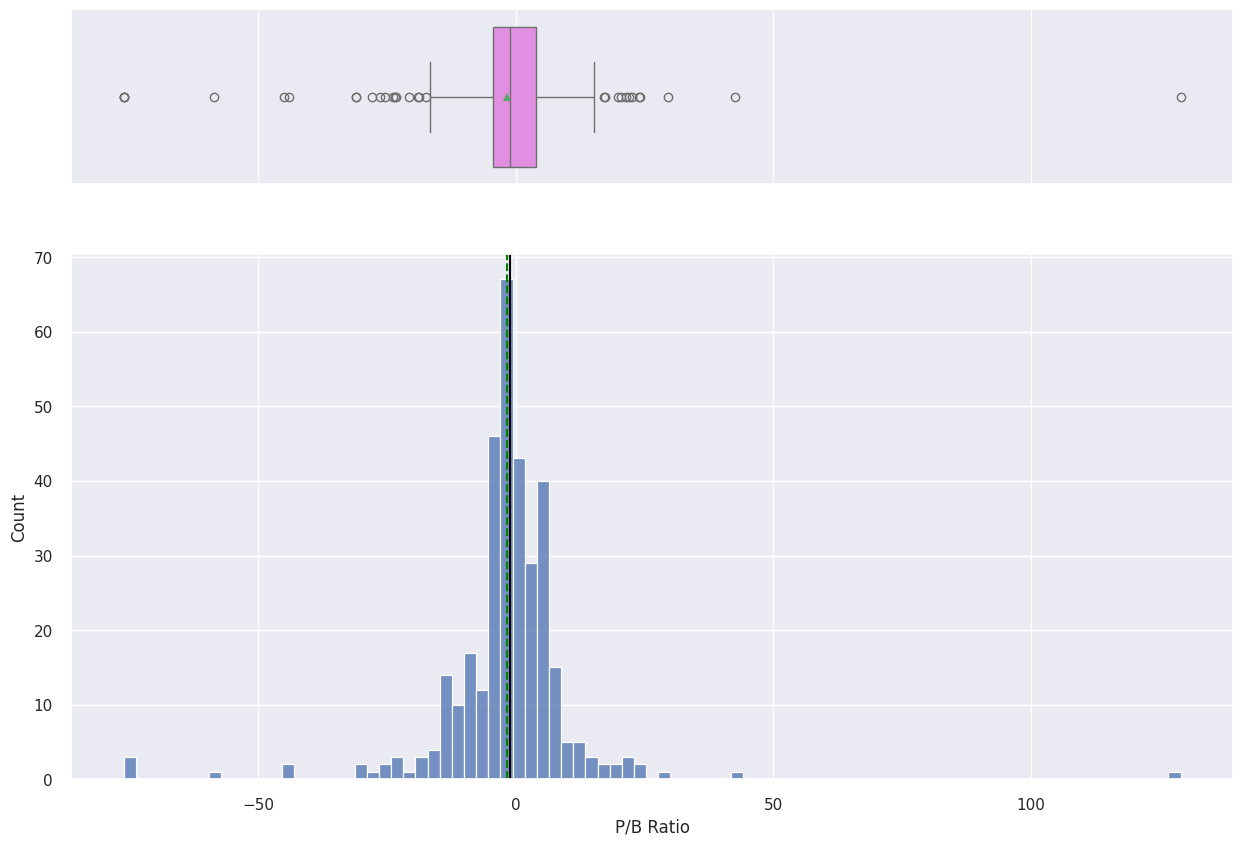

In [48]:
# selecting numerical columns
num_col = trade_ahead_cp_df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(trade_ahead_cp_df, item)

**Observations**

1.	Current Price:
 *	The histogram shows that majority of stock prices are concentrated at the lower end between 0 and 200, with the highest concentration between 0 and 100, indicating that a significant portion of stocks are priced within this range.
 *	The mean is positioned to the right of the median, as seen from both the histogram and box plot, confirming the right-skewed nature of the data. This suggests that a few high-priced stocks are pulling the average upward.
 *	The box plot reveals several outliers beyond the upper whisker, representing companies with significantly higher stock prices compared to the majority. Notably, a few stocks exceed 600, with one extreme outlier above 1200, indicating that a small number of high-value stocks may disproportionately influence overall price-related metrics

2.	Price Change:
 *	The histogram shows that most stock price changes are concentrated around 0, with values ranging approximately between -20 and 20, indicating that the majority of stocks have experienced relatively small fluctuations.
 *	The mean is slightly to the left of the median, as seen from both the histogram and box plot, indicating a slight left-skew, suggesting a minor influence from stocks with lower price changes.
 *	The box plot reveals outliers starting from around -20 and 30, with a few extreme outliers below -40 and one extreme outlier above 50, indicating that some stocks have experienced substantial price fluctuations compared to the majority.

3.	Volatility:
 *	The histogram shows that most stock volatilities are concentrated between 0.8 and 2.0, with the highest frequency observed around 1.0, indicating that the majority of stocks have relatively low volatility.
 *	The mean is slightly to the right of the median, as seen from both the histogram and box plot, indicating a slight right-skew, suggesting that a few highly volatile stocks are pulling the average upward.
 *	The box plot reveals outliers starting from around 2.5, with two extreme outliers above 4.5, indicating that a small number of stocks exhibit significantly higher volatility compared to the majority

4.	ROE (Return on Equity):
 *	The histogram shows that the majority of ROE values are concentrated between 0 and 50, with the highest frequency observed around 25, indicating that most companies have relatively low returns on equity.
 *	The mean is significantly to the right of the median, as observed in both the histogram and box plot, confirming a right-skewed distribution. This suggests that a few companies with exceptionally high ROE values are pulling the average upward.
 *	The box plot reveals outliers starting from around 60, with a few extreme outliers above 450, indicating that some companies have significantly higher ROE compared to the majority.

5.	Cash Ratio:
 *	The histogram shows that the majority of cash ratios are concentrated between 0 and 100, with the highest frequency observed around 0, indicating that most companies have relatively low cash reserves relative to their liabilities.
 *	The mean is slightly to the right of the median, as observed in both the histogram and box plot, indicating a slight right-skew, suggesting that a few companies with very high cash ratios are pulling the average upward.
 *	The box plot reveals outliers starting from around 200, with one extreme value close to 1000, indicating that a small number of companies have exceptionally high liquidity compared to the majority.

6.	Net Cash Flow:
 *	The histogram shows that the majority of net cash flow values are concentrated around 0, indicating that most companies have relatively balanced cash inflows and outflows.
 *	The mean is almost aligned with the median, as seen from both the histogram and box plot, suggesting that the distribution is fairly symmetric, with no significant skewness.
 *	The box plot reveals the presence of multiple outliers on both ends, with a few extreme values at both high and low ends, indicating that some companies experience significantly higher or lower cash flow compared to the majority.

7.	Net Income:
 *	The histogram shows that most net income values are concentrated around 0, indicating that the majority of companies have relatively low or moderate net income levels.
 *	The mean is slightly to the right of the median, as seen from both the histogram and box plot, indicating a slight right-skew, suggesting that a few companies with significantly high net income values are pulling the average upward.
 *	The box plot reveals the presence of multiple outliers on both ends, with a few extreme values at both high and low ends, indicating that some companies experience significantly higher profits or losses compared to the majority.

8.	Earnings Per Share (EPS):
 *	The histogram shows that most earnings per share values are concentrated around 0, with a high frequency of values within a narrow range, indicating that the majority of companies have low or modest earnings per share.
 *	The mean is almost aligned with the median, as observed in both the histogram and box plot, suggesting a nearly symmetric distribution with no significant skewness.
 *	The box plot reveals the presence of multiple outliers on both ends, with a few extreme values below -60 and above 40, indicating that some companies experience significantly higher or lower earnings compared to the majority.

9.	Estimated Shares Outstanding:
 *	The histogram shows that the majority of companies have their estimated shares outstanding concentrated below 500 million, suggesting that a large number of companies have a relatively lower number of shares compared to a few companies with very high share counts.
 *	The mean is positioned to the right of the median, indicating a moderate right-skew, suggesting that a few companies with significantly higher outstanding shares are pulling the average upward.
 *	The box plot reveals outliers starting from around 1 billion, with extreme outliers from 4 billion, and a few exceptional  values beyond 5.5 billion, indicating that some companies have a considerably higher number of outstanding shares compared to the majority.

10.	P/E Ratio (Price-to-Earnings Ratio):
 *	The histogram shows that the majority of P/E ratios are concentrated below 50, indicating that most companies have relatively moderate price-to-earnings ratios.
 *	The mean is to the right of the median, suggesting a right-skewed distribution. This indicates that a few companies with significantly high P/E ratios are pulling the average upward.
 *	The box plot reveals outliers starting from around 50, with extreme outliers beyond 300, and a few exceptional values exceeding 500, indicating that some companies have considerably high valuations compared to the majority.

11.	P/B Ratio (Price-to-Book Ratio)
 *	The histogram shows that the majority of P/B ratios are concentrated around 0, with most values lying within a narrow range, indicating that many companies have relatively low price-to-book ratios.
 *	The mean is slightly to the left of the median, suggesting a nearly symmetrical distribution with no significant skewness.
 *	The box plot reveals outliers on both sides, starting from around -20 and 20, with extreme values below -50 and one extreme value above 100, indicating that some companies have significantly lower or higher valuations compared to their book values.


**Distribution of stock prices**

As seen from the above histrogram and Boxplot for current prices of stock, the mean is positioned to the right of the median,  confirming the right-skewed nature of the stock price distribution.

#### Univariate Analysis for Categorical Column

##### Observations on GICS Sectors

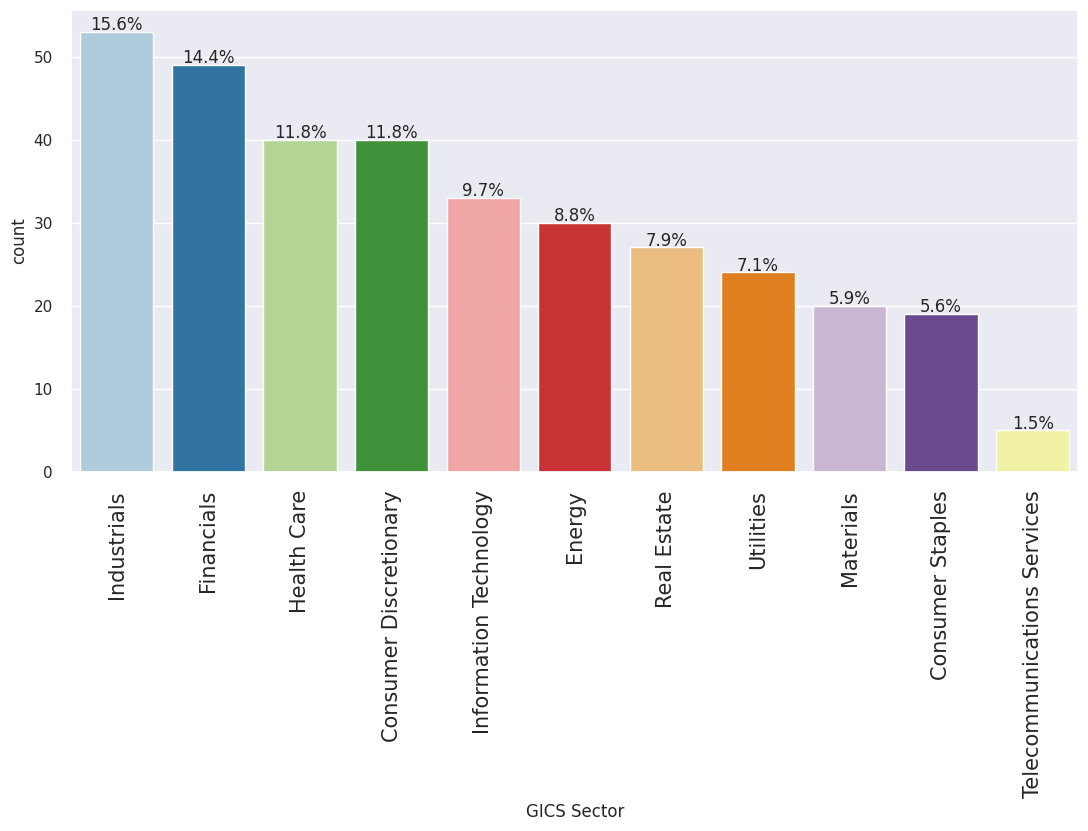

In [51]:
labeled_barplot(trade_ahead_cp_df, "GICS Sector", perc=True)

**Observations**

1. The Industrials sector has the highest representation, accounting for 15.6% of the total companies, followed by the Financials sector at 14.4%, indicating a strong presence of companies from these industries.

2. The Telecommunications Services sector has the lowest representation at 1.5%, suggesting limited participation of telecom companies in the dataset.

3. The presence of a higher number of companies in sectors such as Industrials and Financials could indicate potential overrepresentation in these areas, which may impact diversification strategies for investors seeking a balanced portfolio.

4. Sectors with lower representation, such as Telecommunications Services, may present opportunities for diversification and strategic investments.

##### Observations on GICS Sub Sectors ( Top 10)

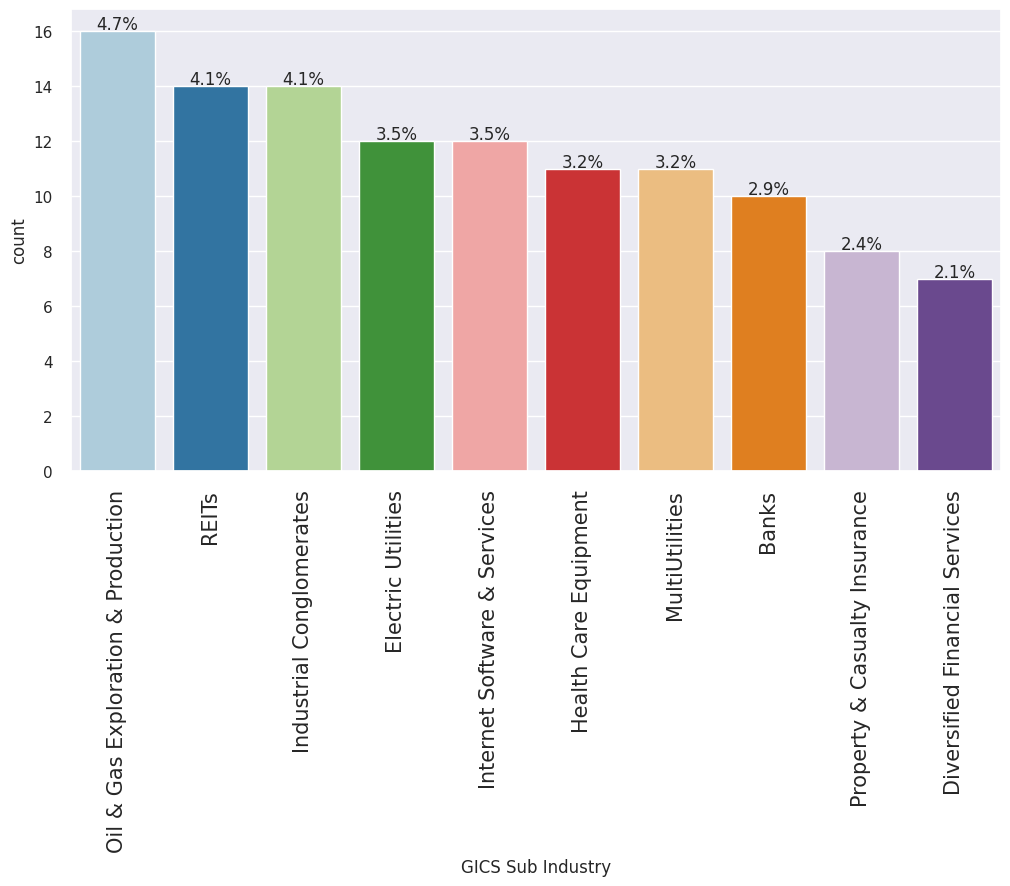

In [56]:
labeled_barplot(trade_ahead_cp_df, "GICS Sub Industry", perc=True ,n=10)

**Observations**

* The Oil & Gas Exploration & Production sub-industry has the highest representation, accounting for 4.7% of the total companies, indicating a significant focus on the energy sector within the dataset.

* REITs and Industrial Conglomerates follow closely, each accounting for 4.1% of the total companies.

### Bivariate Analysis

**Checking the stocks of which economic sector have seen the maximum price increase on average.**

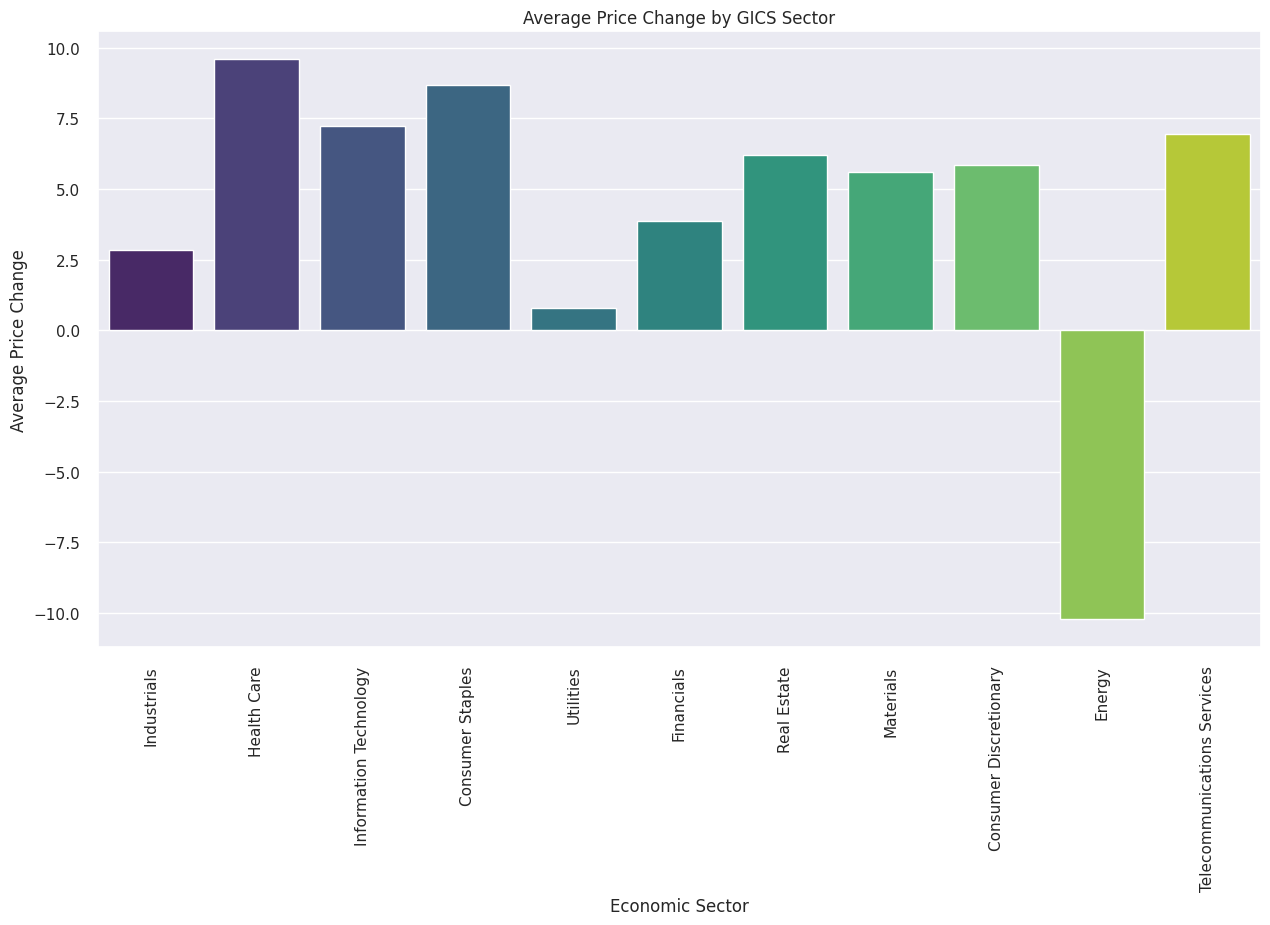

In [61]:
# Set the figure size for better visualization
plt.figure(figsize=(15, 8))

# Create a bar plot showing average price change by GICS sector
sns.barplot(data=trade_ahead_cp_df, x='GICS Sector', y='Price Change', ci=False, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title to the plot
plt.title("Average Price Change by GICS Sector")

# Label the x-axis
plt.xlabel("Economic Sector")

# Label the y-axis
plt.ylabel("Average Price Change")

# Display the plot
plt.show()

**Observations**

* The Health Care sector has seen the maximum price increase on average, with an average price change close to 10, making it the top-performing sector in terms of stock price appreciation.

* The Energy sector shows the largest price change, but on the negative side, reflecting significant stock price decline.

* The Utilities sector has the lowest price change, suggesting relatively flat performance in terms of stock price growth

**Correlation Check to See how different variables correlated with each other**

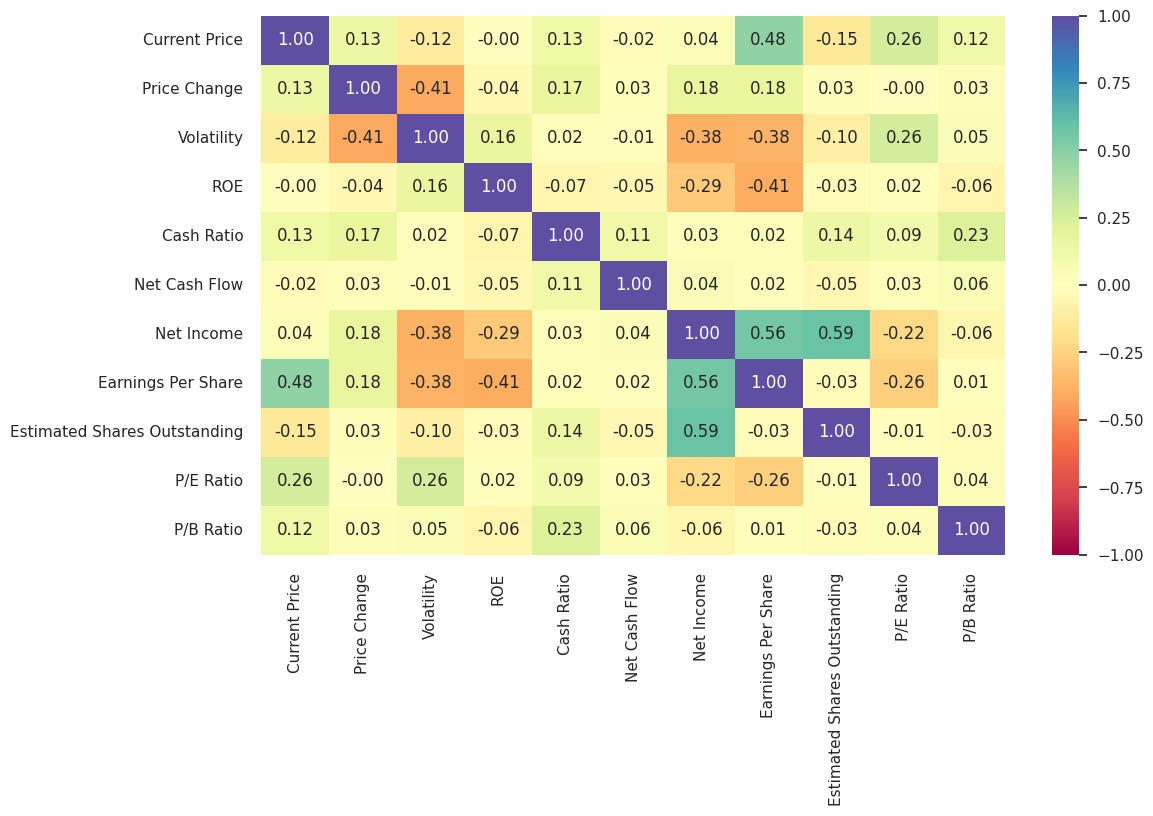

In [62]:
# Select the numeric columns from the DataFrame and store their names in a list
cols_list = trade_ahead_cp_df.select_dtypes(include=np.number).columns.tolist()

# Set the figure size
plt.figure(figsize=(12, 7))

# Plot a heatmap to visualize the correlation matrix of the selected numeric columns
sns.heatmap(
    trade_ahead_cp_df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

# Display the heatmap
plt.show()

**Observations**

Top 3 Positive Correlations:

1. Net Income and Earnings Per Share (0.56): A strong positive correlation suggests that as net income increases, earnings per share (EPS) also tend to increase. This indicates that higher profitability directly translates to higher value for shareholders.

2. Net Income and Estimated Shares Outstanding (0.59):This positive correlation suggests that companies with higher net income tend to have a larger number of shares outstanding. This relationship could indicate that as companies generate higher profits, they might attract more investors, leading to increased ownership and demand for shares. It could also reflect a company's financial strength, enabling it to sustain a larger shareholder base


3. Current Price and Earnings Per Share (0.48): This suggests that higher EPS generally corresponds to higher stock prices, indicating that investors value earnings performance as a significant factor in stock valuation.

Top 3 Negative Correlations:

1. Volatility and Earnings Per Share (-0.41) : This negative correlation implies that stocks with higher earnings per share tend to exhibit lower price volatility, suggesting that financially stable companies experience less fluctuation in their stock prices.

2. Volatility and Net Income (-0.38): A negative relationship indicates that higher net income companies tend to have lower volatility, highlighting that financially strong firms often provide more stability in market performance.

3. Price Change and Volatility (-0.41): This negative correlation indicates that stocks experiencing higher price changes tend to exhibit lower volatility. This could suggest that stocks with substantial, consistent price appreciation or depreciation may experience less frequent fluctuations, whereas stocks with smaller price changes might have more erratic movements. It highlights that larger price movements could be more predictable, leading to lower observed volatility.

**Checking how  average cash ratio vary across economic sectors**

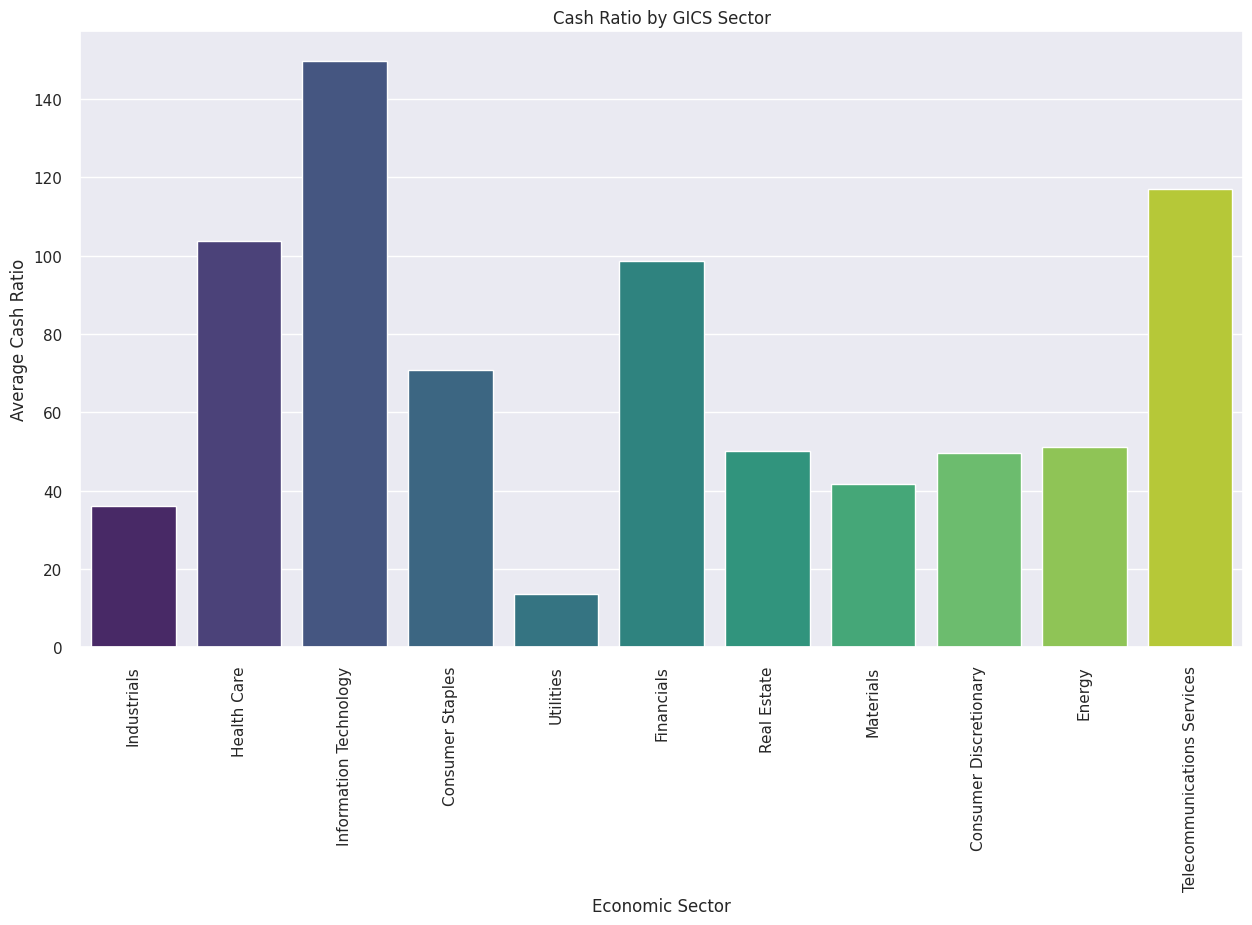

In [63]:
# Set the figure size for better visualization
plt.figure(figsize=(15, 8))

# Create a bar plot showing average price change by GICS sector
sns.barplot(data=trade_ahead_cp_df, x='GICS Sector', y='Cash Ratio', ci=False, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title to the plot
plt.title("Cash Ratio by GICS Sector")

# Label the x-axis
plt.xlabel("Economic Sector")

# Label the y-axis
plt.ylabel("Average Cash Ratio")

# Display the plot
plt.show()

**Observations**

* Information Technology sector has the highest average cash ratio, exceeding 140, indicating that companies in this sector hold substantial cash reserves relative to their liabilities.

* Telecommunications Services follows closely with an average cash ratio close to 120, suggesting that firms in this sector maintain significant liquidity.

* Health Care sector comes 3rd with an average cash ratio slightly above 100.

* Utilities sector has the lowest average cash ratio, below 20, indicating that companies in this sector operate with relatively lower cash reserves, possibly due to high capital expenditures and stable revenue streams. This stability allows utility companies to operate with lower cash reserves, as their predictable income covers operational and capital expenditures without the need for substantial liquidity buffers.

**Checking how P/E ratio vary, on average, across economic sectors**

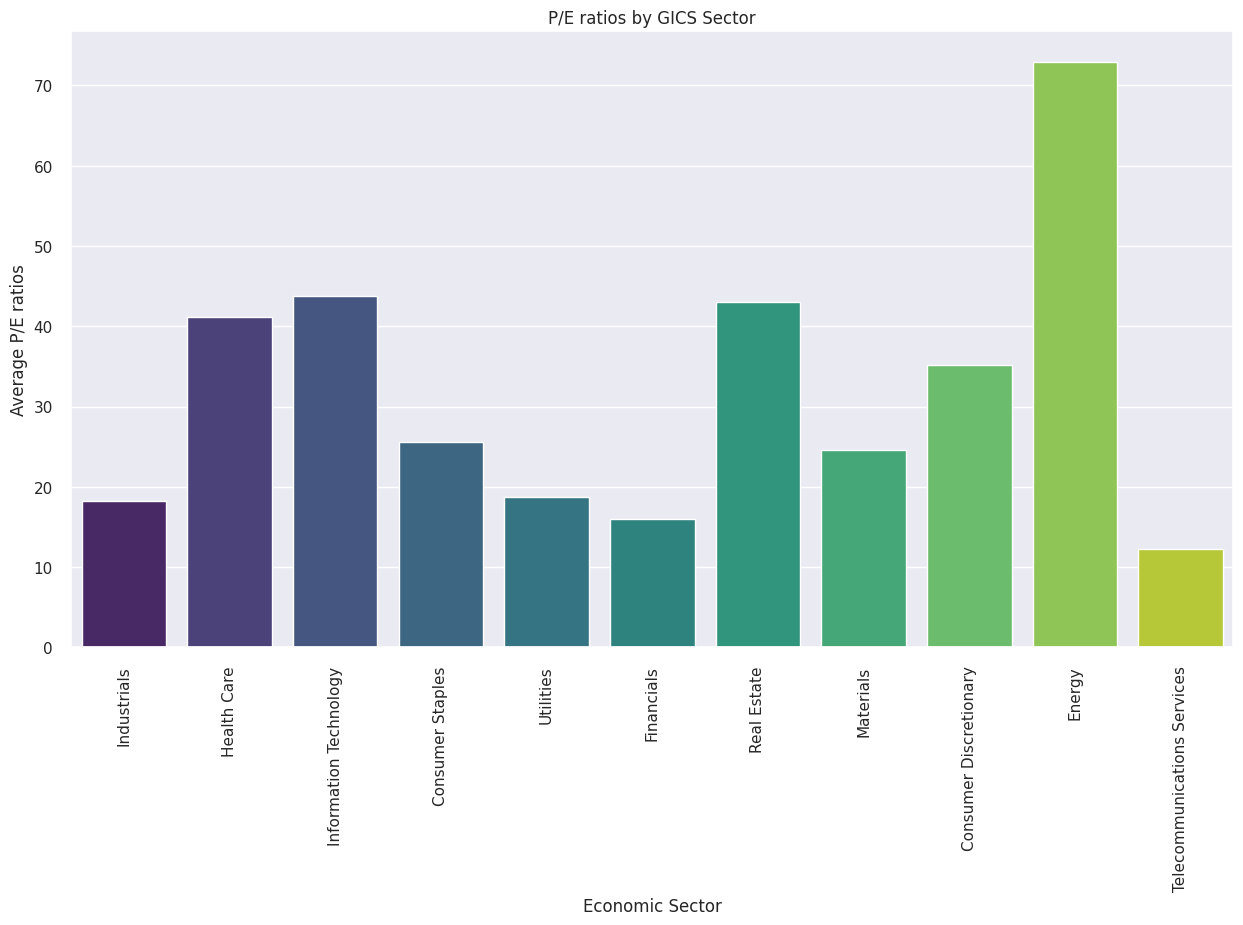

In [65]:
# Set the figure size for better visualization
plt.figure(figsize=(15, 8))

# Create a bar plot showing average price change by GICS sector
sns.barplot(data=trade_ahead_cp_df, x='GICS Sector', y='P/E Ratio', ci=False, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title to the plot
plt.title("P/E ratios by GICS Sector")

# Label the x-axis
plt.xlabel("Economic Sector")

# Label the y-axis
plt.ylabel("Average P/E ratios")

# Display the plot
plt.show()

**Observations**

1. Energy sector has the highest average P/E ratio, exceeding 70. This suggests that investors have high expectations for future growth and earnings potential in this sector, possibly driven by market demand and strategic investments in sustainable energy solutions.

2. Real Estate follows with an average P/E ratio above 45, indicating strong investor confidence in the sector's long-term profitability and stability, potentially fueled by steady cash flows from property investments and appreciation.

3. Information Technology sector, with an average P/E ratio above 40, reflects high investor optimism regarding innovation, growth potential, and recurring revenue streams from technology-based solutions.

4. Telecommunications Services sector has the lowest average P/E ratio, below 15, suggesting that investors may perceive limited growth opportunities or face concerns related to market saturation, regulatory challenges, and high capital expenditures in maintaining and expanding infrastructure.


## Data Preprocessing


### Scaling

Scaling is important in data preprocessing because it ensures that all features are on a similar scale, preventing features with larger magnitudes from dominating the model and improving the efficiency and accuracy of algorithms that rely on distance calculations.

In this section, we will be applying scaling techniques to normalize the feature values, ensuring consistency and optimal model performance

In [5]:
# variables used for clustering
num_col = trade_ahead_cp_df.select_dtypes(include=np.number).columns.tolist()
num_col


['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [6]:
# scaling the dataset before clustering
scaler = StandardScaler()
trade_ahead_subset = trade_ahead_cp_df[num_col].copy()
trade_ahead_subset_scaled = scaler.fit_transform(trade_ahead_subset)

In [7]:
# creating a dataframe of the scaled columns
trade_ahead_subset_scaled_df = pd.DataFrame(trade_ahead_subset_scaled, columns=trade_ahead_subset.columns)

## K-means Clustering

In [56]:
# Create a copy of the scaled dataset to use for K-means clustering analysis
k_means_df = trade_ahead_subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.3862098789299604
Number of Clusters: 3 	Average Distortion: 2.33620927590848
Number of Clusters: 4 	Average Distortion: 2.219050563833442
Number of Clusters: 5 	Average Distortion: 2.133404401901685
Number of Clusters: 6 	Average Distortion: 2.081503686093715
Number of Clusters: 7 	Average Distortion: 2.0045413402786814
Number of Clusters: 8 	Average Distortion: 1.9864237824874411
Number of Clusters: 9 	Average Distortion: 1.956222103389025


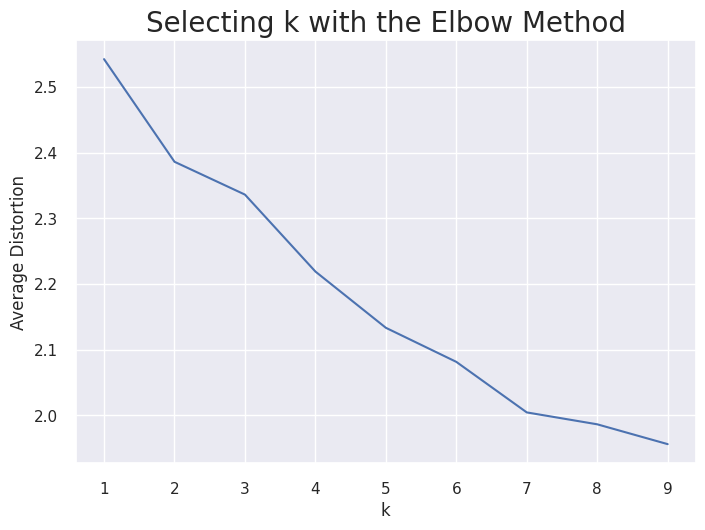

In [58]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(k_means_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**Observations**

The appropriate value of k from the elbow curve appears to be either 5 or 6. We will proceed with the Elbow Method Visualization Tool to validate the optimal number of clusters before further analysis using silhouette scores

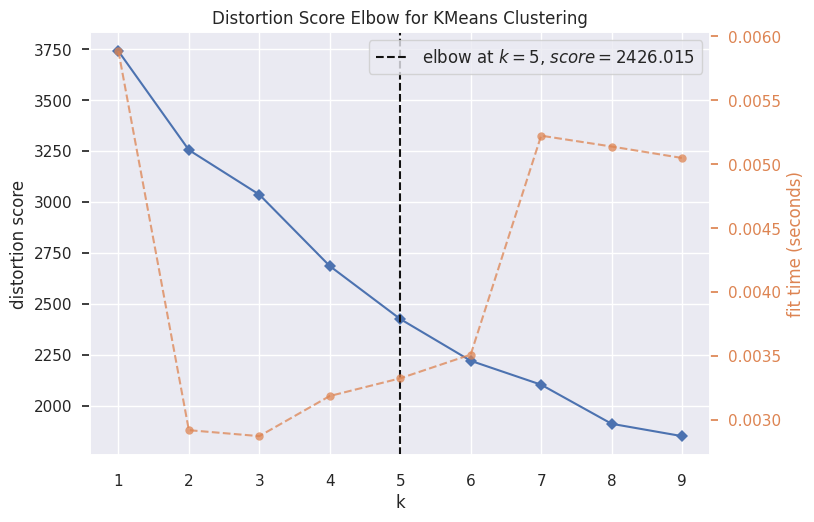

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Observations**

* The elbow visualization indicates that the optimal number of clusters is likely k=5, as it is the point where the distortion score experiences a noticeable decrease before the rate of reduction slows down. Up to k=5, adding more clusters results in a significant drop in distortion, improving cluster compactness. However, beyond k=5, the reduction in distortion becomes more gradual, suggesting diminishing returns in clustering quality.

* Although k=6 still shows a reduction in distortion, the improvement is less pronounced compared to the earlier drops, indicating that increasing the number of clusters further may not provide substantial benefits. Based on this analysis, k=5 is a strong candidate for the optimal cluster count, but further validation using silhouette analysis will help confirm the clustering quality.

### Checking silhouette scores

For n_clusters = 2, silhouette score is 0.45335782729503565
For n_clusters = 3, silhouette score is 0.40374060030338865
For n_clusters = 4, silhouette score is 0.4246430808437099
For n_clusters = 5, silhouette score is 0.4381539778147092
For n_clusters = 6, silhouette score is 0.40869599703024256
For n_clusters = 7, silhouette score is 0.1207450219233897
For n_clusters = 8, silhouette score is 0.3693991650696542
For n_clusters = 9, silhouette score is 0.35185096182499204


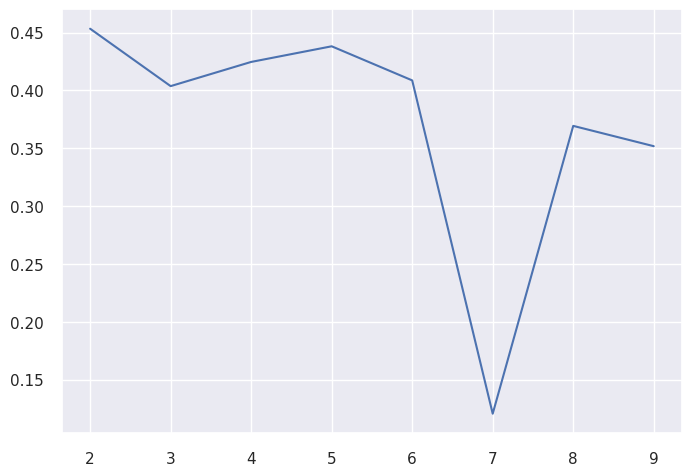

In [62]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1 )
    preds = clusterer.fit_predict((k_means_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**Observations**

* The silhouette score is relatively high at k=5, indicating that five clusters provide a good balance of cohesion and separation among data points. Further validation with visual inspection of the clustering results could confirm this selection. Additionally, k=4 also shows a reasonably good silhouette score, making it a viable alternative to consider..

* At k=6, the silhouette score shows a slight decline, suggesting that adding an extra cluster does not significantly improve cluster quality and may introduce more complexity without clear benefits.

* A sharp drop at k=7 suggests that increasing the number of clusters beyond this point results in poorly defined clusters, likely causing higher intra-cluster variance and overlaps.

Silhouette Analysis for k = 4


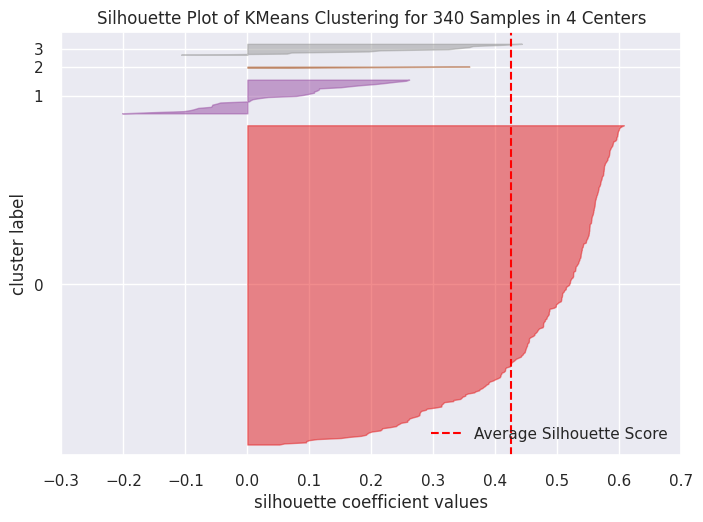

Silhouette Analysis for k = 5


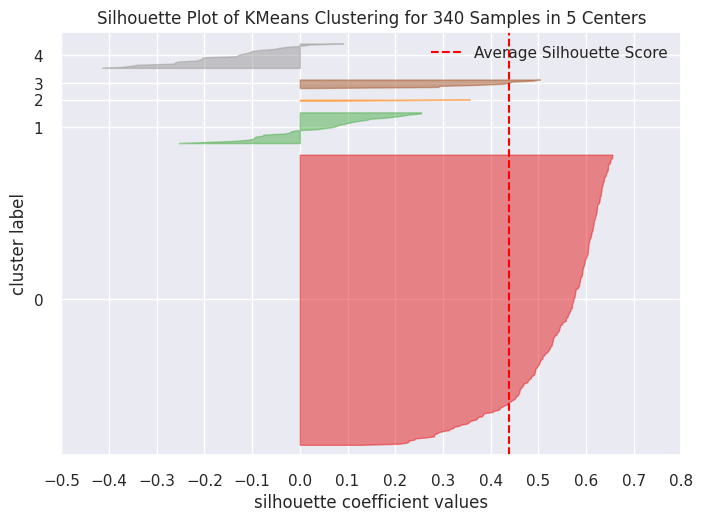

Silhouette Analysis for k = 6


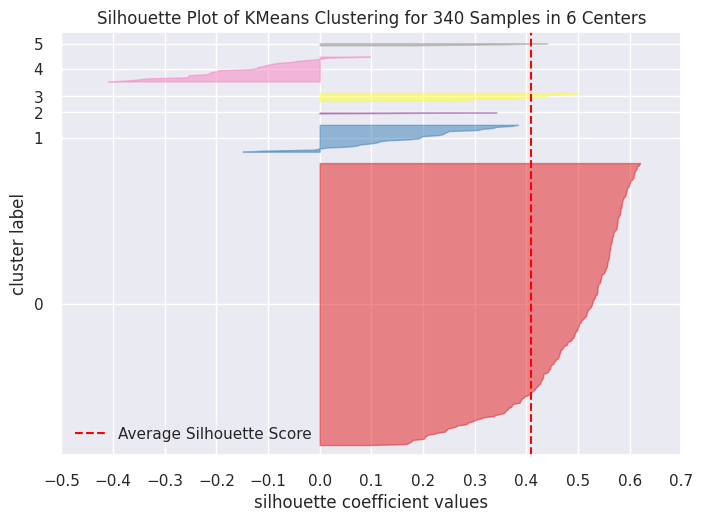

In [65]:
for k in [4, 5, 6]:
    print(f"Silhouette Analysis for k = {k}")
    visualizer = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=1))
    visualizer.fit(k_means_df)
    visualizer.show()

**Observations**

1. Cluster Distribution and Shape:

 For k = 4, the clusters are relatively well-distributed, with one dominant cluster occupying a significant portion of the data while the others remain compact and well-separated, minimizing overlap. At k = 5, an additional cluster emerges, potentially representing a distinct subgroup, aligning with the elbow method and distortion score trends that indicate an optimal segmentation point. While this introduces finer granularity, silhouette scores show only a marginal improvement over k = 4, with slight fragmentation appearing. At k = 6, further splitting of the dominant cluster results in smaller, overlapping clusters, with a noticeable drop in silhouette score and increased negative values, suggesting over-segmentation. Despite this, k = 5 and k = 6 remain strong considerations, as they may capture meaningful distinctions in the data that could be overlooked at k = 4, requiring further validation through silhouette scores, average distortion trends, and cluster interpretability..

2. Average Silhouette Score

 The silhouette scores for k = 4 and k = 5 are very close, showing that both provide a similar balance between cohesion and separation among clusters. Although k = 5 has a slight advantage, the difference is small, making k = 4 a strong alternative with a simpler structure. However, at k = 6, the silhouette score drops further, with more points showing negative values, meaning the clustering quality weakens as more clusters are added. In k = 5, Cluster 0 has the highest silhouette score (~0.65) compared to all other setups, which shows that at least one cluster is well-formed and clearly distinct, making k = 5 worth considering. However, k = 5 also has more data points in the negative silhouette region compared to k = 4, which suggests a higher chance of overlap or misclassification in some clusters.

3. Negative Silhouette Values

 At k = 4, there are fewer negative silhouette values, meaning most points are correctly assigned to their clusters with minimal overlap or misclassification. In comparison, k = 5 shows a slight increase in negative values, suggesting that some points are closer to neighboring clusters, leading to a higher chance of misclassification. At k = 6, negative silhouette values remain present, though not higher than in k = 5. However, cluster fragmentation increases, leading to weaker separation and more overlap and potential overfitting.


4. Width of Clusters

 For k = 4, Cluster 0 remains dominant, with a significantly larger width compared to the others, while one cluster is noticeably thin. At k = 5, width variation increases, as an additional cluster becomes thin, making two noticeably compact clusters. Despite this, the overall separation remains reasonable. However, at k = 6, cluster widths become even more inconsistent, with three noticeably thin clusters, suggesting weaker boundaries, increased overlap, and a higher risk of excessive fragmentation and overfitting.


**Conclusion**

Based on the analysis of silhouette visuals, silhouette scores, the elbow method, and cluster distribution, k = 5 is the optimal choice for the final model. The silhouette score for k = 5 (0.44) is slightly higher than k = 4 (0.43), indicating better cohesion and separation. The elbow plot further supports this, showing diminishing returns in distortion reduction beyond k = 5. While k = 6 introduces fragmentation and overlap, k = 5 provides a balance of separation, interpretability, and minimal overfitting risk, making it the best choice.

### Creating Final Model

In [66]:
# final K-means model
kmeans = KMeans(n_clusters=5, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=5, random_state=1)

In [67]:
# creating a copy of the original data
trade_ahead_k_means_df = trade_ahead_cp_df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
trade_ahead_k_means_df["K_means_segments"] = kmeans.labels_

In [71]:
trade_ahead_k_means_df

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.35,10.00,1.69,135,51,-604000000,7610000000,11.39,668129938.50,3.72,-8.78,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.24,8.34,2.20,130,77,51000000,5144000000,3.15,1633015873.00,18.81,-8.75,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.91,11.30,1.27,21,67,938000000,4423000000,2.94,1504421769.00,15.28,-0.39,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.94,13.98,1.36,9,180,-240840000,629551000,1.26,499643650.80,74.56,4.20,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.32,-1.83,1.70,14,272,315120000,696878000,0.31,2247993548.00,178.45,1.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.26,14.89,1.85,15,459,-1032187000,-4359082000,-4.64,939457327.60,28.98,6.26,4
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.52,-8.70,1.48,142,27,159000000,1293000000,2.97,435353535.40,17.68,-3.84,0
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.59,9.35,1.40,1,100,376000000,147000000,0.78,188461538.50,131.53,-23.88,0
338,ZION,Zions Bancorp,Financials,Regional Banks,27.30,-1.16,1.47,4,99,-43623000,309471000,1.20,257892500.00,22.75,-0.06,0


### Cluster Profiling

In [75]:
# Calculate the mean of numerical columns for each cluster
km_cluster_profile = trade_ahead_k_means_df.groupby("K_means_segments")[num_col].mean()

# Display the cluster profile
km_cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
K_means_segments,,,,,,,,,,,
0,72.74,5.18,1.38,34.83,53.14,-10147287.27,1488641570.91,3.64,437961614.92,23.68,-3.40
1,65.11,-11.89,2.72,44.00,61.40,-36858300.00,-2137169366.67,-5.56,529714171.05,113.49,0.91
2,24.49,-13.35,3.48,802.00,51.00,-1292500000.00,-19106500000.00,-41.81,519573983.25,60.75,1.57
3,46.67,5.17,1.08,25.00,58.33,-3040666666.67,14848444444.44,3.44,4564959946.22,15.60,-6.35
4,211.16,12.46,1.70,30.71,280.25,2197085166.67,2808600583.33,6.82,738957421.66,37.90,15.68


In [76]:
# Add a column to show the count of data points in each cluster
km_cluster_profile["count_in_each_segment"] = (
    trade_ahead_k_means_df.groupby("K_means_segments")["Security"].count().values
)
km_cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.74,5.18,1.38,34.83,53.14,-10147287.27,1488641570.91,3.64,437961614.92,23.68,-3.40,275
1,65.11,-11.89,2.72,44.00,61.40,-36858300.00,-2137169366.67,-5.56,529714171.05,113.49,0.91,30
2,24.49,-13.35,3.48,802.00,51.00,-1292500000.00,-19106500000.00,-41.81,519573983.25,60.75,1.57,2
3,46.67,5.17,1.08,25.00,58.33,-3040666666.67,14848444444.44,3.44,4564959946.22,15.60,-6.35,9
4,211.16,12.46,1.70,30.71,280.25,2197085166.67,2808600583.33,6.82,738957421.66,37.90,15.68,24


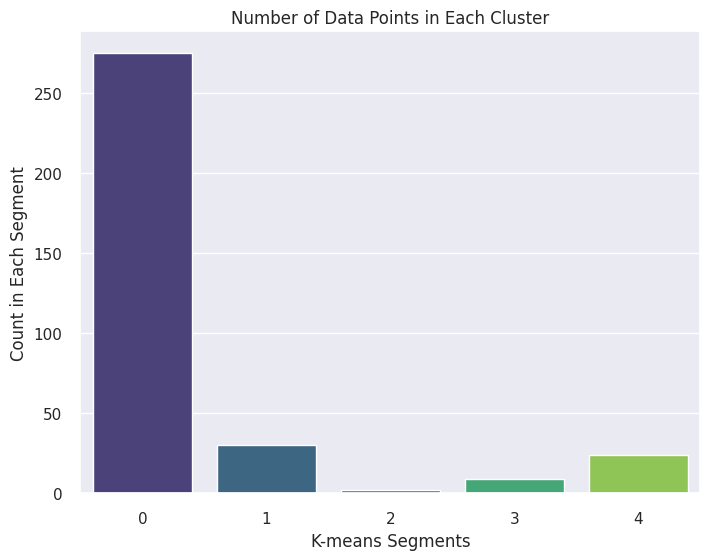

In [77]:
# Plotting the bar chart for cluster counts
plt.figure(figsize=(8, 6))
sns.barplot(x=km_cluster_profile.index, y=km_cluster_profile["count_in_each_segment"], palette="viridis")

# Adding labels and title
plt.xlabel("K-means Segments")
plt.ylabel("Count in Each Segment")
plt.title("Number of Data Points in Each Cluster")

# Display the plot
plt.show()


**Observations**

1. Cluster 0 Dominance:
 * The majority of the data points fall within cluster 0, with a total count of 275. This suggests that the characteristics of this cluster are the most prevalent within the dataset, potentially representing a common trend among the data.

2. Sparse Distribution in Cluster 2 and 3:
 * Clusters 1, 2, and 4 contain significantly fewer data points compared to cluster 0. Specifically, cluster 2 has only 2 observations, making it the smallest group, while clusters 1 and 4 have relatively higher counts of 30 and 24, respectively, but still indicate sparse representation compared to cluster 0. This suggests that these clusters may represent niche segments with distinct characteristics

3. Imbalanced Cluster Sizes:
 * There is a noticeable imbalance in the distribution of data across clusters. The wide variation in segment sizes (from 2 to 275) suggests that the clustering algorithm may have identified groups with differing densities, which could impact interpretability and model application.

4. Potential Need for Further Analysis:
 * The low counts in clusters 2 and 3 raise questions about whether these represent meaningful segments or noise in the data. Further analysis, such as reviewing the defining characteristics of these clusters, may help determine if they should be retained or merged with other clusters.

In [78]:
# display cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.738269,5.179897,1.380738,34.825455,53.138182,-10147287.272727,1488641570.909091,3.636164,437961614.918582,23.680917,-3.395254,275
1,65.106668,-11.888125,2.722141,44.000000,61.400000,-36858300.000000,-2137169366.666667,-5.560333,529714171.048000,113.488924,0.905486,30
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
4,211.164720,12.456786,1.699388,30.708333,280.250000,2197085166.666667,2808600583.333333,6.818333,738957421.659167,37.895420,15.682619,24


**Observations**

1. **Cluster 4:**
 - Has the highest in Current Price, Price Change, Cash Ratio, Net Cash Flow, Earnings Per Share (EPS), and P/B Ratio

2. **Cluster 3:**
 - Highest in Net Income and Estimated Shares Outstanding, but the lowest in Volatility, ROE, P/B Ratio and Net Cash Flow

3. **Cluster 2:**
 - Dominates in Volatility and ROE, but the lowest in Current Price, Price Change, Cash Ratio, Net Income, Earnings Per Share (EPS), and Count in Each Segment.

4. **Cluster 1:**
 - Leads with the highest P/E Ratio, and follows Cluster 2 in second position in terms of  Volatility, and ROE

5. **Cluster 0:**
 - Has the largest cluster size based on the number observations, depicted by the Count in Each Segment


In [82]:
## Complete the code to print the companies in each cluster
for cl in trade_ahead_k_means_df["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(trade_ahead_k_means_df[trade_ahead_k_means_df["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [84]:
pd.crosstab(trade_ahead_k_means_df['K_means_segments'], trade_ahead_k_means_df['GICS Sector'])
#.style.highlight_max(color="lightgreen", axis=0)

GICS Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
K_means_segments,,,,,,,,,,,
0,33,17,5,45,29,52,24,18,26,2,24
1,1,0,21,0,1,1,4,2,0,0,0
2,0,0,2,0,0,0,0,0,0,0,0
3,1,1,1,3,1,0,0,0,0,2,0
4,5,1,1,1,9,0,5,0,1,1,0


**Observations**

- **Cluster 0:**
 - Has the largest cluster size based on the number observations, as depcited by the Count in Each Segment
 - Listed Companies under the industrials sector are the most dominant, followed by the Consumer Discreationary sector

- **Cluster 1:**
 - 2nd largest cluster size based on the number observations, as depicted by the Count in Each Segment
 - Other sectors aside FInaicals an Information technology have two or less listed companies in this cluster
 - The Financial sector is the most dominant based on the number of listed companies present in this cluster, followed by the Information technology sector, which is a distant second.

- **Cluster 2:**
 - Has the smallest cluster size based on the number observations, as depicted by the Count in Each Segment
 - Only Energy sector has companies listed in this cluster(2 companies). The rest of the sectors have no presence in this cluster

- **Cluster 3:**
 - Has a small cluster size, with higher of number observations compared to cluster 2
 - The Financials sector has the highest number of listed companies in this cluster, followed by the Telecommunication Services

- **Cluster 4:**
 - 3rd largest cluster size based on the number observations, as shown by the Count in Each Segment
 - Health care sector has the highest number of listed companies present in this cluster, followed by the Information technology sector and Consumer Discreationary sector, whic are tied in second postion

- The Energy sector has representation in all the clusters, followed by Health Care and Consumer Discretionary sectors, with representation in 4 clusters

- With the exception of the energy sector, which has its most dominant presence in cluster 1, all the rest have their largest presence in cluster zero, which is the largest cluster.


In [81]:
trade_ahead_k_means_df.groupby(["K_means_segments", "GICS Sector"])['Security'].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary         33
                  Consumer Staples               17
                  Energy                          5
                  Financials                     45
                  Health Care                    29
                  Industrials                    52
                  Information Technology         24
                  Materials                      18
                  Real Estate                    26
                  Telecommunications Services     2
                  Utilities                      24
1                 Consumer Discretionary          1
                  Energy                         21
                  Health Care                     1
                  Industrials                     1
                  Information Technology          4
                  Materials                       2
2                 Energy                          2
3                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      3
                  Health Care                     1
                  Telecommunications Services     2
4                 Consumer Discretionary          5
                  Consumer Staples                1
                  Energy                          1
                  Financials                      1
                  Health Care                     9
                  Information Technology          5
                  Real Estate                     1
                  Telecommunications Services     1
Name: Security, dtype: int64

**Observations**

- Overall, Industial sector has highest number of listed companies (53) and dominates Cluster 0, which is the largesr cluster. Outside of cluster 0, it only has one company listed under cluster 1

- Financials sector has second highest number of listed companies (49) overall and is in second positon to Industial sector in Cluster 0. Outside of cluster 0, it has minimal representation in two other clusters ( Clusters 3 and 4)

- Consumer Discretionary and Health Care are tied in 3rd postion, each having a total of 40 companies listed . Both have the most representation in 4 different clusters (Clusters 0,1,3 and 4), with Health Care sector being the most dominant in cluster 4

- While the Energy sector (5) has the second-lowest representation, just above the Telecommunications Services sector (2), in Cluster 0, the most dominant cluster, it has the highest number of listed companies in Cluster 2 and is the only sector that has representation in all the clusters. Additionally, it has the most dominant presence in cluster 1,


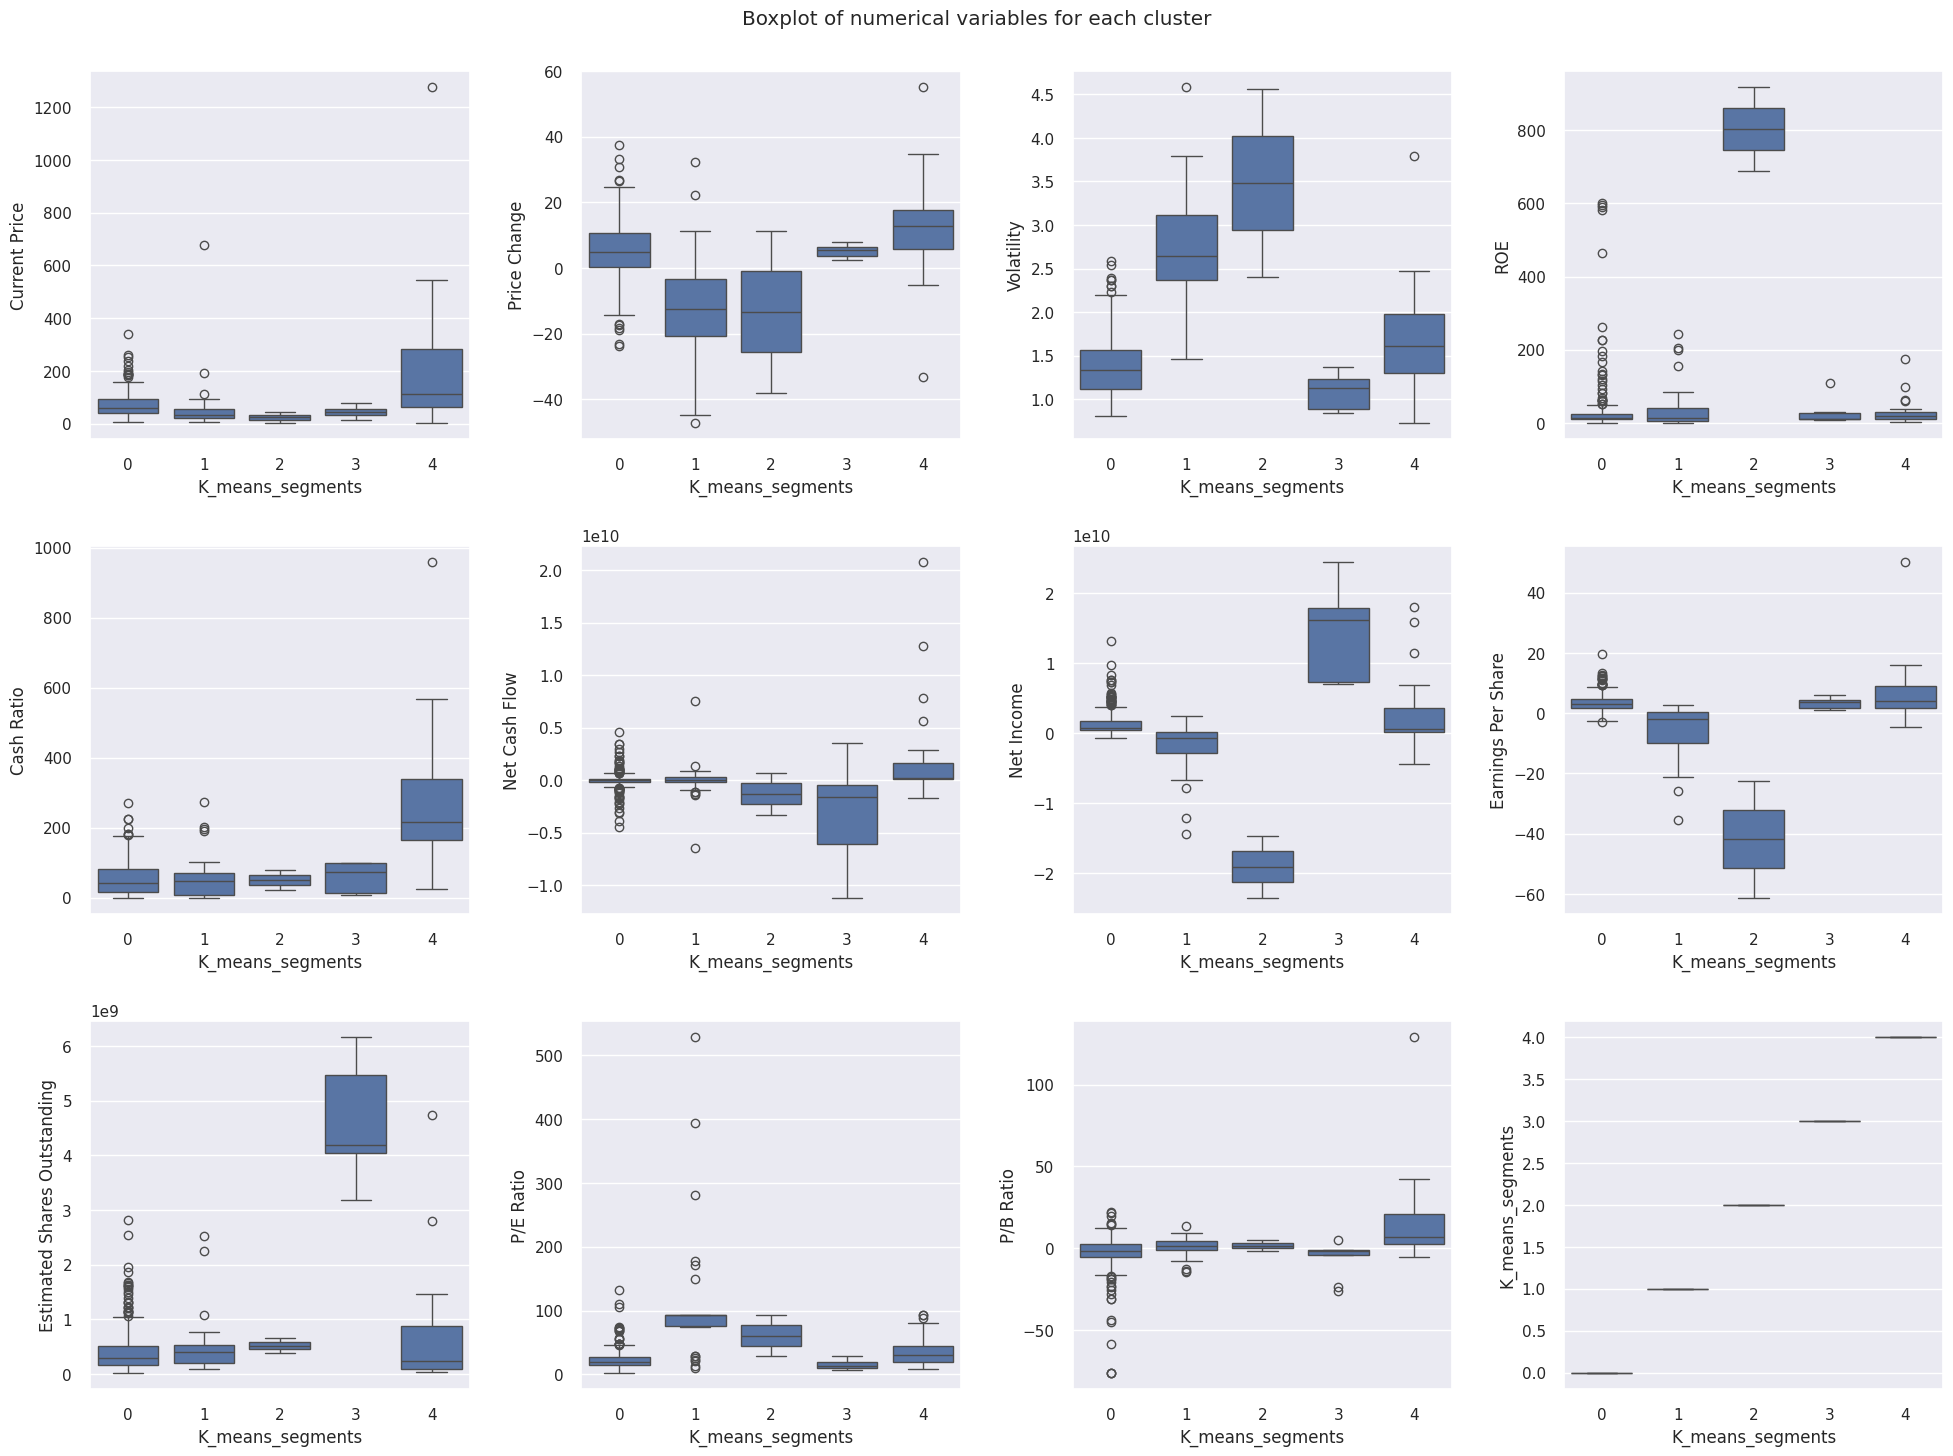

In [88]:
plt.figure(figsize=(20, 15))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = trade_ahead_k_means_df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=trade_ahead_k_means_df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights


- **Cluster 0:**
 - Current Price and Cash Ratio are relatively low, suggesting lower-valued stocks with moderate liquidity. ROE, compared to other clusters, is moderate, but it has several high-end outliers, indicating that a significant number of companies in this cluster exhibit exceptionally strong profitability relative to their equity.

 - Net Cash Flow is mostly concentrated within a narrow range and close to zero, but outliers exist in both directions, representing companies with extreme positive and negative cash flow.

 - Net Income is also concentrated within a narrow range and close to zero, but it has numerous high-end outliers, indicating several highly profitable companies, while the majority of companies remain near-zero in profitability.

 - Volatility and P/E Ratio are relatively low, reflecting more stable stocks with less price fluctuation.

 - Estimated Shares Outstanding is relatively low, meaning these companies generally have fewer shares in circulation compared to Cluster 3. On the other hand, Earnings Per Share (EPS), when compared to other clusters, is moderately okay, supported by relatively decent Net Income levels and fewer outstanding shares.

 - Price Change appears moderately fluctuating, with some outliers on both sides, suggesting that while most companies in this cluster have consistent price movements, there are still occasional extreme shifts in stock prices.

 - Cluster 0 contains companies characterized by moderate profitability, stable stock performance, and a mix of highly profitable and struggling companies, with relatively low market valuation and smaller shares outstanding. Despite the moderate performance, the cluster includes several outliers across key metrics such as ROE, Net Cash Flow, Net Income, and Price Change. Cluster 0 has the largest number of companies, explaining the presence of numerous outliers due to the broader range of data points. Listed Companies under the industrials sector are the most dominant,


- **Cluster 1:**
 - Current Price is lower compared to Cluster 0, suggesting that companies in this cluster are valued slightly lower in the market.

 - Net Cash Flow is concentrated within a narrow range and is mostly close to zero, with a few extreme outliers, reflecting consistent but low cash flow across most companies in this cluster.

 - Net Income also has wide variation, with values below zero, reflecting negative profitability across most companies in this cluster, and several companies are experiencing financial losses.

 - Volatility and P/E Ratio are higher compared to Cluster 0, reflecting higher price fluctuations and market valuation multiples, indicating growth potential but also higher risk.

 - Estimated Shares Outstanding is similar to Cluster 0, with fewer shares in circulation compared to other clusters, but with a few upper outliers indicating some companies with higher outstanding shares.

 - Price Change shows the second-largest variation and is predominantly below zero, with a few outliers above zero, suggesting that while most companies in this cluster experience downward price movements, there are occasional extreme positive shifts in stock prices.

 - Earnings Per Share(EPS) is low, which is directly related to negative profitability and low Net Income in Cluster 1. The negative profitability results in lower EPS values for most companies in this cluster. However, ROE is relatively high, which can be explained by the fact that ROE measures profitability relative to equity. Companies with low equity can achieve a high ROE even with low or negative profits, meaning that while Net Income is low, companies are still able to generate higher returns on their equity.

 - Cluster 1 has the second-largest cluster size based on the number of observations, as depicted by the Count in Each Segment. It is dominated by the Financial sector, followed by the Information Technology sector. Other sectors, aside from Financials and Information Technology, have two or fewer listed companies in this cluster. Companies in Cluster 1 are characterized by low profitability, with a mix of struggling and moderately profitable companies. This cluster displays high market fluctuations, higher volatility, and negative profitability across many companies, suggesting that it represents a more volatile and risk-oriented subset of the market. The majority of companies in Cluster 1 have low or slightly negative cash flow, and Net Income shows significant negative profitability, with a few outliers indicating slightly better performance. Despite this, a small subset of companies in Cluster 1 generates high returns on equity (ROE).


- **Cluster 2:**
 - Current Price is the lowest compared to all other clusters, indicating that companies in this cluster are the most undervalued in the market. Price Change is highly fluctuating, with wider variation in the negative region, suggesting that while the price of these companies is low, it also experiences significant shifts, particularly on the downside.

 - Earnings Per Share(EPS)  is low, which is directly related to the low Net Income in Cluster 2. The negative profitability and wide variation in Net Income result in lower EPS values for most companies in this cluster. However, ROE is relatively higher, which can be explained by the fact that ROE measures profitability relative to equity. Despite the low Net Income, companies with low equity may still show relatively high ROE, since a smaller equity base can lead to a higher return on that equity, even if the actual profit is low.

 - Net Cash Flow has the second-highest variation within the group, but it is predominantly below zero, indicating that while most companies in this cluster have negative cash flow, there are a few extreme values, both negative and slightly positive, contributing to the significant variation.

 - Net Income is the lowest in this category, with values predominantly negative and wide variation, indicating that almost all companies in this cluster are operating at a loss.

 - Volatility and P/E Ratio are relatively high, indicating greater price fluctuations and higher market valuation multiples, suggesting that these companies have higher market expectations despite negative or low profitability.

 - Estimated Shares Outstanding are relatively low, with a narrow range and some upper outliers, indicating that most companies have a smaller number of shares outstanding, but a few companies have a larger amount of shares in circulation.

 - Price Change is highly fluctuating, with wider variation compared to other clusters, and is the highest in this factor category, suggesting that these companies experience the most extreme shifts in stock prices compared to other clusters.

 - Cluster 2 has the smallest cluster size, with the Energy sector being the most dominant, although this cluster has very few companies overall. Companies in Cluster 2 are characterized by negative profitability, with the majority of companies exhibiting negative Net Income. There is significant variation, with the lowest Net Income values across the clusters. This cluster also experiences greater market fluctuations and higher volatility, indicating that it represents a more volatile and risk-oriented subset of the market.


- **Cluster 3:**
 - Current Price is higher compared to Cluster 2, indicating that the companies in this cluster are generally valued higher in the market. Price Change shows moderate fluctuation, with some outliers, indicating that these companies experience consistent but slightly fluctuating price movements.

 - ROE has moderate variation, and a few outliers in the higher range, suggesting that companies in this cluster generally have average profitability relative to their equity, with a few companies showing stronger profitability compared to others in the cluster.

 - Net Cash Flow has the largest variation, with no outliers and is predominantly below zero, indicating that most companies in this cluster have negative cash flow, but with a significant spread in values.

 - Net Income shows moderate variation, with values entirely above zero, indicating that most companies in this cluster are profitable, but there is variation in profitability levels, with some companies being more profitable than others.Most profitable companies are found in this cluster.

 - Volatility and P/E Ratio are the lowest, indicating more stable stock performance with less price fluctuation and lower market valuation multiples, suggesting that companies in this cluster are generally less risky compared to other clusters.

 - Estimated Shares Outstanding has the largest variation and is the highest among all the clusters, suggesting that the number of shares in circulation is more diverse in this cluster, with some companies having a significantly higher number of shares outstanding.

 - Price Change shows the smallest variation, reflecting relatively stable price movements for most companies in this cluster, with only a few minor fluctuations in stock prices.

 - Cluster 3 has a moderate-sized cluster, dominated by the Financials sector, with moderate representation from other sectors. Companies in this cluster are highly profitable, with Net Income showing significantly better performance compared to other clusters. Net Cash Flow, however, exhibits the largest variation, predominantly below zero, and with a significant spread in values, indicating negative cash flow across most companies. The cluster has moderate volatility and market expectations, indicating a mix of stability and potential for growth..

- **Cluster 4:**
 - Current Price is the highest compared to all other clusters and shows the largest variation, indicating that companies in this cluster are generally valued higher in the market.

 - Price Change shows moderate fluctuation, with variations similar to Cluster 0, suggesting that while most companies in this cluster experience consistent price movements, there are still some extreme shifts in stock prices, similar to the price movements seen in Cluster 0.

 - Net Cash Flow is mostly above zero, with a few outliers on the upper whisker, indicating that the majority of companies in this cluster have positive cash flow, with a few companies showing extremely high positive values in terms of cash flow.

 - Net Income is generally positive, with moderate variation, indicating that most companies in this cluster are profitable, but there are still a few companies with negative income, contributing to the wide variation in Net Income.

 - Volatility and P/E Ratio are moderate, suggesting moderate price fluctuations and market valuation multiples, indicating that these companies have average market expectations and moderate risk levels.

 - Estimated Shares Outstanding show a wide variation, with a few upper outliers, indicating that companies in this cluster have a higher number of shares outstanding, with some companies having significantly more shares compared to others in this cluster.

 - Price Change shows moderate fluctuation, with wider variation compared to Cluster 2, reflecting that companies in this cluster experience consistent price movements, but still have some extreme shifts in stock prices.

 - Cluster 4 has a moderate-sized cluster, dominated by the Healthcare sector, with moderate representation from the Technology and Consumer Discretionary sectors. Companies in Cluster 4 are characterized by moderate profitability, positive Net Income, and average market expectations with moderate risk. Cluster 4 has the highest cash ratio, indicating strong liquidity with moderate to high cash reserves, and most companies show positive net cash flow, reflecting healthy operational cash generation. This suggests that companies in Cluster 4 are better positioned in terms of cash flow generation compared to other clusters. The majority of companies exhibit healthy financial operations, though the variation indicates some level of inconsistency in cash flow generation.

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [8]:
# Create a copy of the scaled dataset to use for hierarchical clustering analysis
hc_cluster_df = trade_ahead_subset_scaled_df.copy()

In [9]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_cluster_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_cluster_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [10]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Observations**

We see that the cophenetic correlation with Euclidean distance and average linkage is the highest , followed by Cophenetic correlation for Chebyshev distance and average linkage


**Exploring different linkage methods with Euclidean distance only.**

In [11]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_cluster_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_cluster_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [12]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Observations**

We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

### Checking Dendrograms

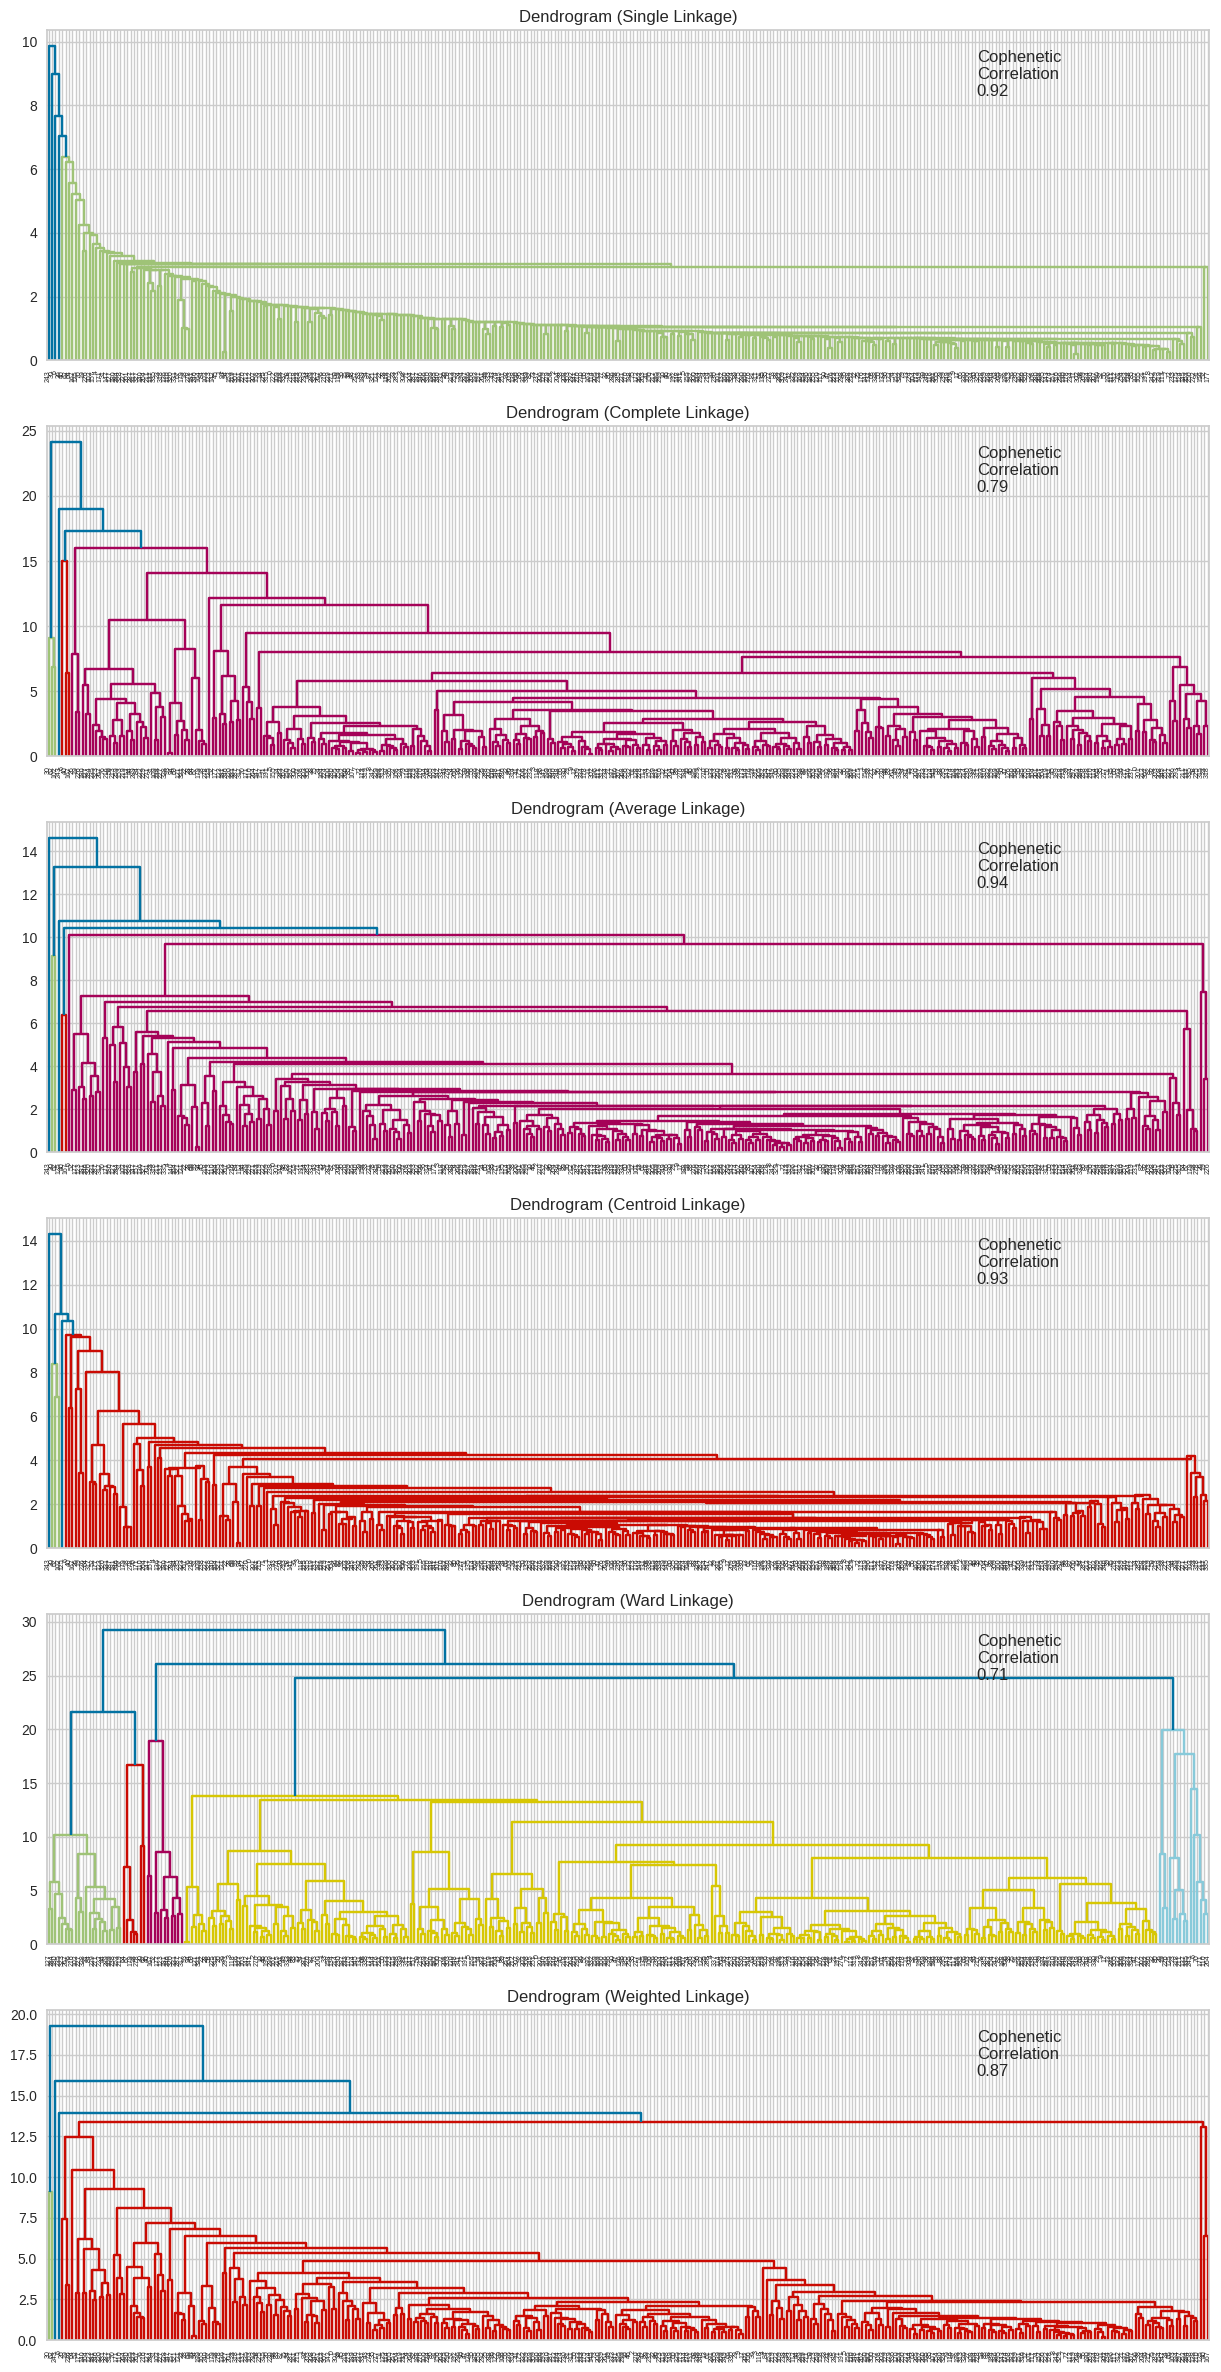

In [13]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_cluster_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_cluster_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [14]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.92
1,complete,0.79
2,average,0.94
3,centroid,0.93
4,ward,0.71
5,weighted,0.87


**Observations**

The dendrogram for Ward linkage shows distinct and well-separated clusters, forming 5 clear groups that align with the K-Means clustering results. Despite the lower cophenetic correlation coefficient of 0.71, this consistency suggests that 5 clusters may indeed be the natural grouping in the data, reinforcing confidence in the chosen value of kk. The alignment between the two methods further indicates that the data has well-defined, compact, and spherical clusters, which both Ward and K-Means are effective at identifying

### Creating Final Model

Let's create 5 clusters.

In [19]:
HCmodel = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
HCmodel.fit(hc_cluster_df)

AgglomerativeClustering(n_clusters=5)

In [20]:
# creating a copy of the original data
trade_ahead_hc_cluster_df = trade_ahead_cp_df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_cluster_df["Hc_segments"] = HCmodel.labels_
trade_ahead_hc_cluster_df["Hc_segments"] = HCmodel.labels_

In [21]:
trade_ahead_hc_cluster_df

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Hc_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.35,10.00,1.69,135,51,-604000000,7610000000,11.39,668129938.50,3.72,-8.78,3
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.24,8.34,2.20,130,77,51000000,5144000000,3.15,1633015873.00,18.81,-8.75,3
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.91,11.30,1.27,21,67,938000000,4423000000,2.94,1504421769.00,15.28,-0.39,3
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.94,13.98,1.36,9,180,-240840000,629551000,1.26,499643650.80,74.56,4.20,3
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.32,-1.83,1.70,14,272,315120000,696878000,0.31,2247993548.00,178.45,1.06,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.26,14.89,1.85,15,459,-1032187000,-4359082000,-4.64,939457327.60,28.98,6.26,0
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.52,-8.70,1.48,142,27,159000000,1293000000,2.97,435353535.40,17.68,-3.84,3
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.59,9.35,1.40,1,100,376000000,147000000,0.78,188461538.50,131.53,-23.88,3
338,ZION,Zions Bancorp,Financials,Regional Banks,27.30,-1.16,1.47,4,99,-43623000,309471000,1.20,257892500.00,22.75,-0.06,3


### Cluster Profiling

In [22]:
# Calculate the mean of numerical columns for each cluster
hc_cluster_profile = trade_ahead_hc_cluster_df.groupby("Hc_segments")[num_col].mean()

# Display the cluster profile
hc_cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
Hc_segments,,,,,,,,,,,
0,326.20,10.56,1.64,14.40,309.47,288850666.67,864498533.33,7.79,544900261.30,113.10,19.14
1,84.36,3.85,1.83,633.57,33.57,-568400000.00,-4968157142.86,-10.84,398169036.44,42.28,-11.59
2,42.85,6.27,1.12,22.73,71.45,558636363.64,14631272727.27,3.41,4242572567.29,15.24,-4.92
3,72.76,5.21,1.43,25.60,60.39,79951512.28,1538594322.81,3.66,446472132.23,24.72,-2.65
4,36.44,-16.07,2.83,57.50,42.41,-472834090.91,-3161045227.27,-8.00,514367806.20,85.56,0.84


In [23]:
# Add a column to show the count of data points in each cluster
hc_cluster_profile["count_in_each_segment"] = (
    trade_ahead_hc_cluster_df.groupby("Hc_segments")["Security"].count().values
)
hc_cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
Hc_segments,,,,,,,,,,,,
0,326.20,10.56,1.64,14.40,309.47,288850666.67,864498533.33,7.79,544900261.30,113.10,19.14,15
1,84.36,3.85,1.83,633.57,33.57,-568400000.00,-4968157142.86,-10.84,398169036.44,42.28,-11.59,7
2,42.85,6.27,1.12,22.73,71.45,558636363.64,14631272727.27,3.41,4242572567.29,15.24,-4.92,11
3,72.76,5.21,1.43,25.60,60.39,79951512.28,1538594322.81,3.66,446472132.23,24.72,-2.65,285
4,36.44,-16.07,2.83,57.50,42.41,-472834090.91,-3161045227.27,-8.00,514367806.20,85.56,0.84,22


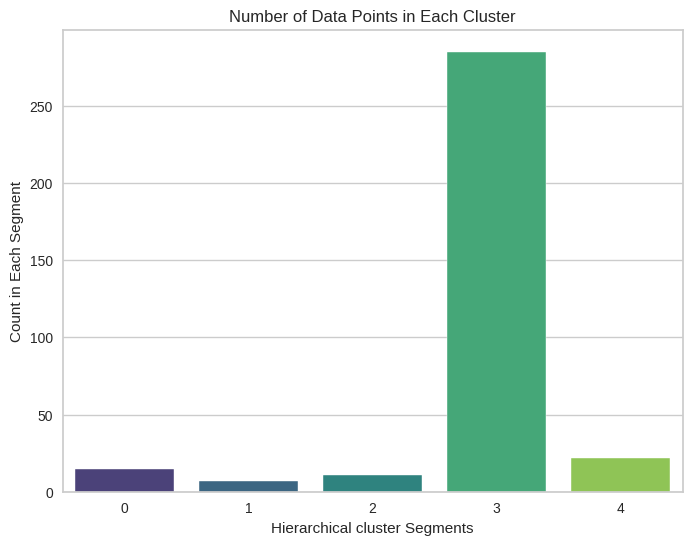

In [24]:
# Plotting the bar chart for cluster counts
plt.figure(figsize=(8, 6))
sns.barplot(x=hc_cluster_profile.index, y=hc_cluster_profile["count_in_each_segment"], palette="viridis")

# Adding labels and title
plt.xlabel("Hierarchical cluster Segments")
plt.ylabel("Count in Each Segment")
plt.title("Number of Data Points in Each Cluster")

# Display the plot
plt.show()


**Observations**

1. Cluster 3 Dominance:
 - The majority of the data points fall within cluster 3, with a total count exceeding 270. This suggests that the characteristics of this cluster are the most prevalent within the dataset, potentially representing a common trend among the data.

2. Sparse Distribution Across Clusters 0, 1, 2, and 4:
 - Clusters 0, 1, 2, and 4 contain significantly fewer data points compared to cluster 3. This indicates that these clusters may represent niche segments or potential outliers with distinct characteristics that are not commonly found in the dataset. This suggests that these clusters may represent niche segments with distinct characteristics.

3. Imbalanced Cluster Sizes:
 - The distribution of data across clusters is noticeably imbalanced. The wide variation in segment sizes, with cluster 3 dominating and other clusters having considerably fewer points, suggests that the clustering algorithm has identified groups with differing densities, which could affect interpretability and further analysis.

4. Potential Need for Further Analysis:
 - The low counts in clusters 1 and 2 raise questions about whether they represent meaningful segments or noise. Further analysis, such as examining the defining characteristics of these clusters, may help determine their relevance or the need for merging them with other clusters


In [25]:
# display cluster profiles
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
Hc_segments,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


**Observations**

1. **Cluster 4:**
 - Has the highest in volatity, lowest in current price and price change, and second highest P/E ratio , P/B ratio, and  ROE

2. **Cluster 3:**
 - Has the largest cluster size based on the number observations, as depicted by the Count in Each Segment
 - Has the third largest Net cash flow and ROE, and second highest Earnings Per share

3. **Cluster 2:**
 - Dominates in Net Cash flow , Net Income, and ROE, but has the lowest  Current Price and P/E ratio. It has ge second largest Cash ratio

4. **Cluster 1:**
 - Leads with the highest ROE, and follows Cluster 0 in second position in terms of current price. It has the lowest cash ratio , net cash flow, earnings per share, and P/B ratio

5. **Cluster 0:**
 - Dominates in current price, price change, cash ratio, earnings per share, P/E ratio, and P/B ratio. It has the third largest net income, and 2nd largest estimated shares outstanding



In [26]:
## Complete the code to print the companies in each cluster
for cl in trade_ahead_hc_cluster_df["Hc_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(trade_ahead_hc_cluster_df[trade_ahead_hc_cluster_df["Hc_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [27]:
pd.crosstab(trade_ahead_hc_cluster_df['Hc_segments'], trade_ahead_hc_cluster_df['GICS Sector'])

GICS Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
Hc_segments,,,,,,,,,,,
0,3,1,0,0,5,0,4,0,1,1,0
1,1,2,2,1,0,1,0,0,0,0,0
2,1,1,1,4,1,0,1,0,0,2,0
3,35,15,7,44,34,52,27,19,26,2,24
4,0,0,20,0,0,0,1,1,0,0,0


**Observations**


- **Cluster 0:**
 - 3rd largest cluster size based on the number of observations, as depicted by the Count in Each Segment.
 - The Health Care sector is the most dominant, followed by the Information Technology sector.

- **Cluster 1:**
 - Has the smallest cluster size based on the number of observations, as depicted by the Count in Each Segment.
 - Energy and Consumer Staples are both tied in the first position, with each having two listed companies in this cluster.

- **Cluster 2:**
 - The Financials sector leads this cluster in terms of number of companies listed, followed by Telecommunication services.

- **Cluster 3:**
 - Has the largest cluster size based on the number of observations, as depicted by the Count in Each Segment.
 - The Industrials sector has the highest number of listed companies in this cluster, followed by the Financials sector.

- **Cluster 4:**
 - 2nd  largest cluster size based on the number of observations, as shown by the Count in Each Segment.
 - The Energy sector has the highest number of listed companies in this cluster, followed by Information Technology and Materials sectors, which are tied in a distant second position.

- No sector has representation in all the clusters. However, the following sectors have representation in four clusters - Consumer Discretionary , Cusumer staples, Information technology and energy sectors

- All the sectors have their largest presence in cluster three, which is the largest cluster.

In [28]:
trade_ahead_hc_cluster_df.groupby(["Hc_segments", "GICS Sector"])['Security'].count()

Hc_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy                          7
             Financials                     44
             Health Care                    34
             Industrials                    52
             Information Technology         27
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
4            Energy                         20
             Information Technology          1
             Materials                       1
Name: Security, dtype: int64

**Observations**

- Overall, Industial sector has highest number of listed companies (53) and dominates Cluster 3, which is the largest cluster. Outside of cluster 3, it only has one company listed under cluster 1

- Financials sector has second highest number of listed companies overall (49) and is in second positon to Industial sector in Cluster 3. Outside of cluster 3, it has minimal representation in two other clusters ( Clusters 1 and 2)

- Consumer Discretionary and Health Care are tied in 3rd postion, each having a total of 40 companies listed .

- While the Energy sector (7) has the second-lowest representation, just above the Telecommunications Services sector (2), in Cluster 3, the most dominant cluster, it has the highest number of listed companies in Cluster 2 and is the only sector that has representation in all the clusters.



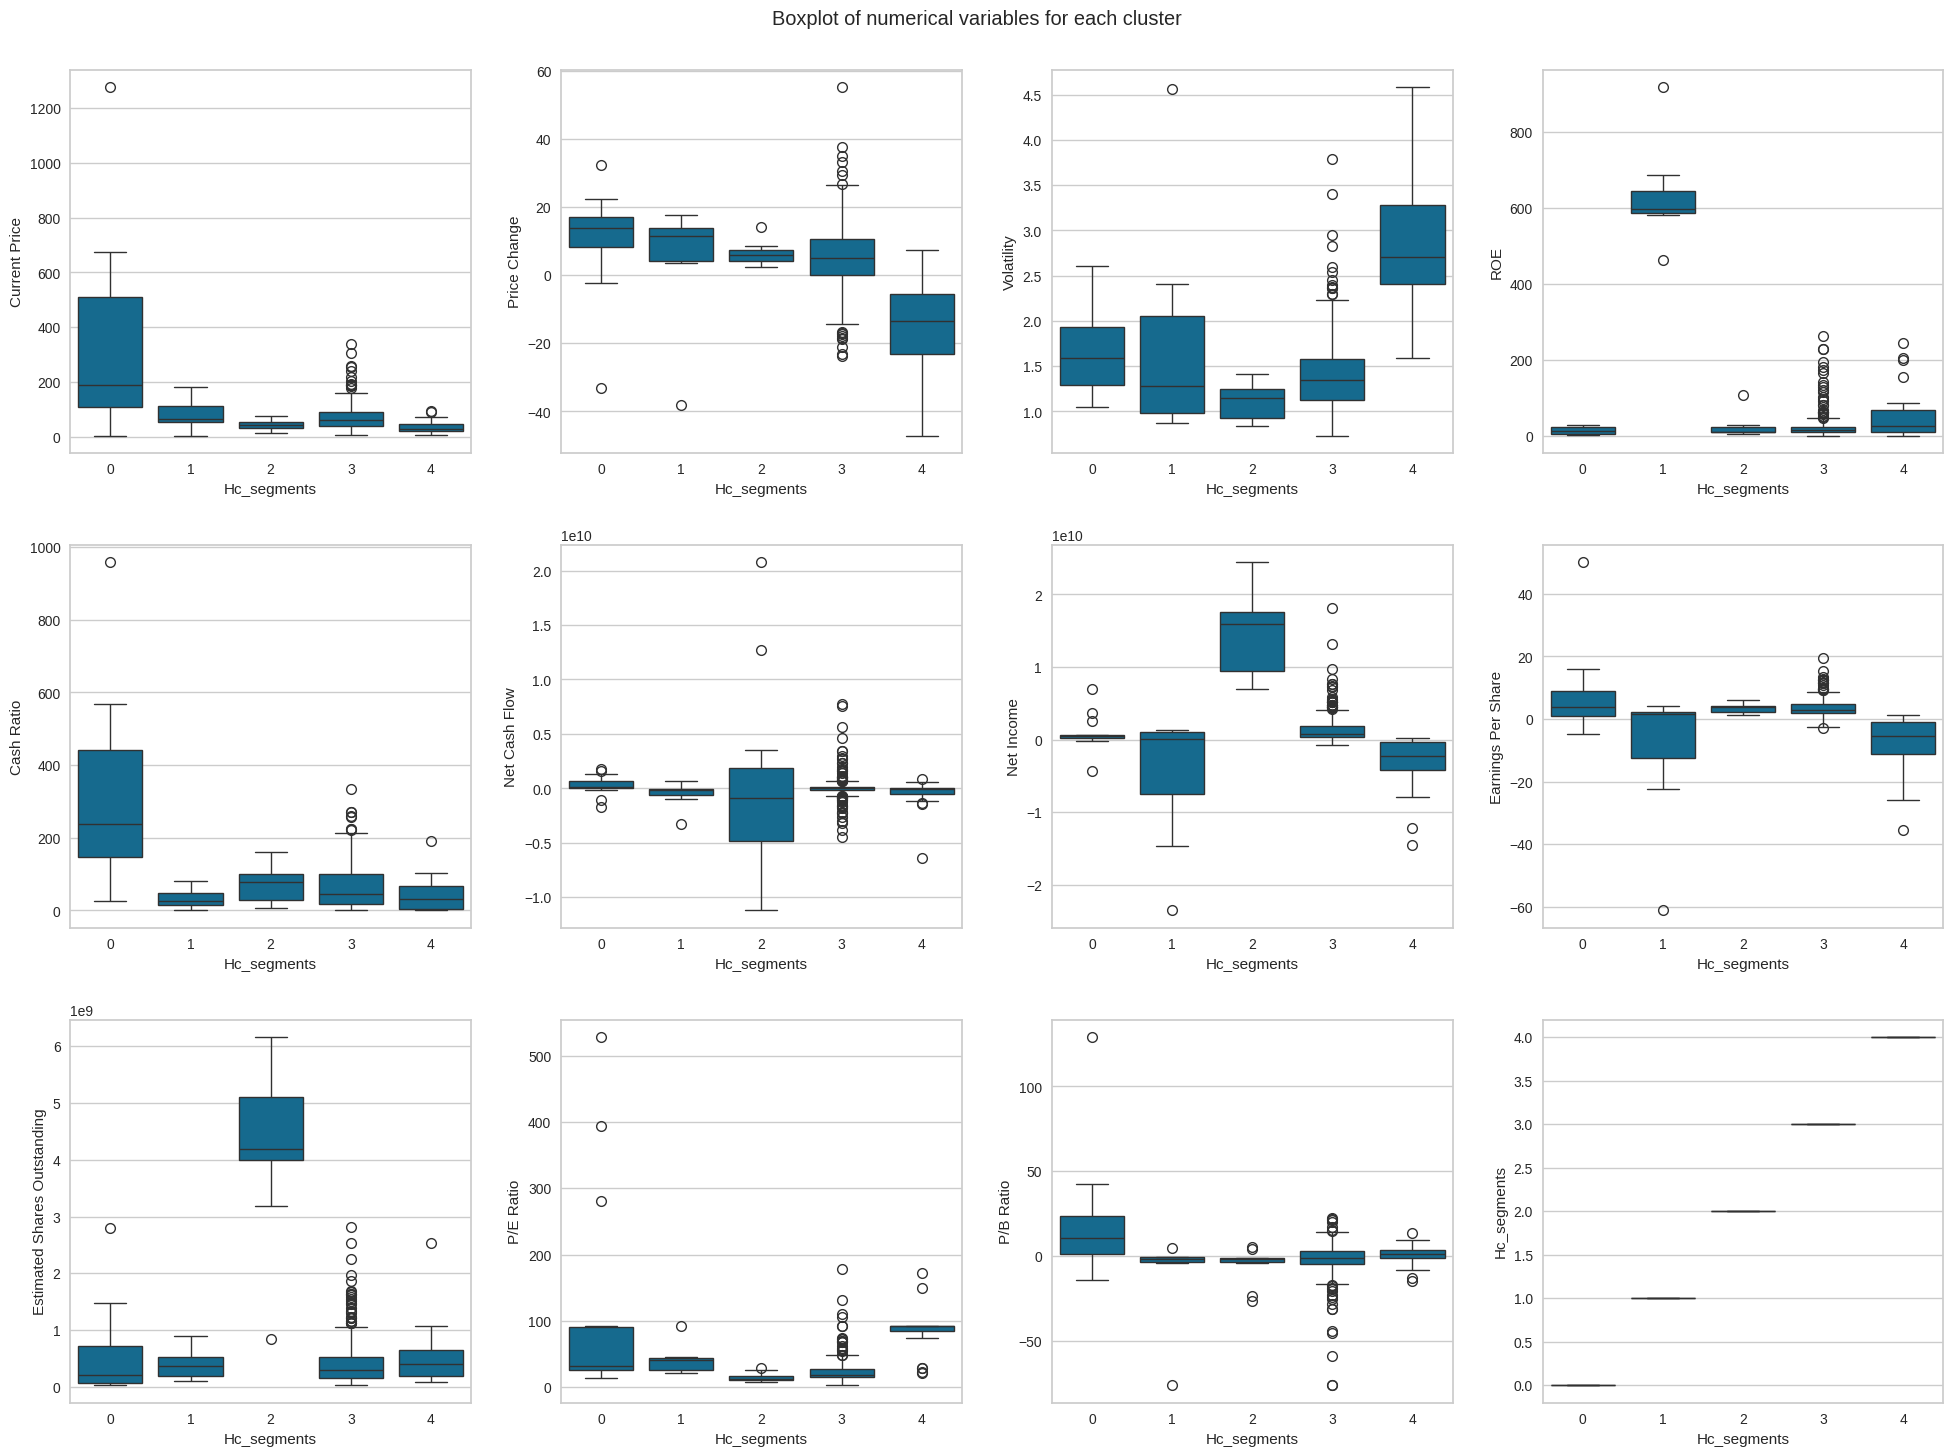

In [29]:
plt.figure(figsize=(20, 15))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = trade_ahead_hc_cluster_df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=trade_ahead_hc_cluster_df, x="Hc_segments", y=variable)

plt.tight_layout(pad=2.0)

###Insights

- **Cluster 0:**
 - Current Price and Cash Ratio are the highest in their respective categories, suggesting that companies in this cluster are valued higher with relatively better liquidity compared to other clusters.

 - Price Change shows moderate fluctuation, with the mean being relatively high. The variation is moderate, and while there are some outliers in both directions, the upper side has only one outlier, suggesting that most companies have stable price movements.

 - Volatility is slightly above moderate, indicating that the companies in this cluster experience some price fluctuations, but the volatility level remains under control compared to more volatile clusters.

 - Net Cash Flow and Net Income exhibit similar characteristics, both concentrated around zero. While Net Cash Flow has a few negative outliers and one positive outlier (not extreme), Net Income shows a similar distribution but with a few more positive outliers, indicating that a few companies in this cluster are more profitable, while the majority remain near zero. ROE follows a similar pattern, concentrated around zero with no outliers, suggesting that the majority of companies in this cluster have moderate or near-zero returns on equity, similar to their cash flow and profitability.

 - Estimated Shares Outstanding shows moderate variation, with only one outlier. The majority of companies in Cluster 0 have a relatively small number of shares outstanding, with a few companies having significantly more shares in circulation compared to others.

 - P/E Ratio shows moderate variation with a few extreme values at the higher end, indicating that most companies in this cluster have a normal price-to-earnings ratio, while a few are valued higher relative to their earnings.
 price

 - Cluster 0 contains companies characterized by moderate profitability, relatively high valuation, and moderate levels of profitability. Dominated by the Health Care sector, it has a relatively balanced distribution of profitability and valuation metrics, suggesting that companies in this cluster are generally stable and exhibit steady earnings. Cluster 0 has the third-largest size based on the number of observations, indicating a diverse mix of companies.

- **Cluster 1:**
 - Current Price is lower compared to Cluster 0, suggesting that companies in this cluster are valued slightly lower in the market. Cash Ratio shows moderate variation, with no extreme outliers. This indicates that companies in Cluster 1 generally have moderate liquidity compared to other clusters.

 - Price Change fluctuates moderately, with no significant outliers, indicating that price movements are relatively stable.

 - Volatility shows the highest variation in this cluster, indicating that these companies experience greater fluctuations in stock prices compared to other clusters.

 - Net Cash Flow is primarily concentrated around zero, with a skew towards the negative side. There are only a few outliers on the negative side, indicating that most companies in this cluster have stable but low or slightly negative cash flow generation.

 - Net Income exhibits a larger variation compared to Net Cash Flow, with most values being negative and scattered across a wider range. This suggests that the majority of companies in this cluster are not profitable and that profitability is not concentrated around zero. EPS follows a similar trend to Net Income, with moderate variation and mostly negative values. However, EPS has one outlier in the upper region and one in the lower region, indicating that a few companies have either relatively higher or lower earnings per share.

 - Estimated Shares Outstanding (ESO) shows moderate variation in Cluster 1, with most companies having a consistent range of shares outstanding. There are no extreme outliers, but the distribution reflects a moderate spread of values, indicating that companies in this cluster generally have a moderate number of shares outstanding.

 - ROE (Return on Equity)  shows moderate variation, with one outlier in the upper positive range and one in the lower positive range. Despite this, the overall ROE in this cluster remains the highest compared to other metrics in the cluster, suggesting that the companies with positive profitability relative to their equity are relatively few but still present in Cluster 1.

 - P/E Ratio is low in this cluster, with a few higher outliers. This suggests that most companies in Cluster 1 have a relatively low price-to-earnings ratio, indicating that they are either undervalued or experiencing lower profitability compared to other clusters. The few higher outliers indicate that there are some companies perceived as growth stocks with higher valuations.

 - Cluster 1 has the smallest cluster size based on the number of observations. Dominated by the Energy and Consumer Staples sectors, each with only two listed companies. Companies in this cluster are characterized by lower market valuations, moderate liquidity, and significant unprofitability. These companies exhibit high volatility and price fluctuations. Net Cash Flow is mostly negative, with values concentrated around zero and a few negative outliers. Net Income demonstrates negative profitability, with the majority of companies in this cluster experiencing losses, and a few extreme negative outliers indicating a further decline in profitability. Despite very low profitability, ROE is the highest, reflecting a few companies that generate high returns on equity..


- **Cluster 2:**
 - Current Price is concentrated within a narrow range and is one of the lowest among all clusters, indicating that companies in this cluster are undervalued compared to others.

 - Price change shows moderate fluctuation but is concentrated within a narrow range. While there is some movement, it isn't as extreme as in other clusters.

 - Volatility has the lowest variation, suggesting that companies in this cluster experience relatively stable stock performance, although there is still some price fluctuation.

 - Net Cash Flow exhibits the widest variation, with the majority of companies showing negative cash flow. There are two extreme positive outliers, indicating some companies are generating significantly higher cash flow. On the other hand, the Cash Ratio has moderate variation and is not concentrated below zero, suggesting that these companies generally maintain a reasonable level of liquidity, but the variation indicates some inconsistency in cash holdings.

 - Net Income has significant variation, with the majority of companies having positive values, suggesting that many companies in this cluster are profitable. However, the variation indicates differences in profitability levels.

 - Earnings Per Share (EPS) and  ROE (Return on Equity) both exhibit similar patterns, with both concentrated around zero. This suggests that most companies in Cluster 2 have low or near-zero profitability. The presence of an outlier in ROE is not significant enough to alter the overall trend, indicating that the majority of companies show similar levels of performance in both metrics.

 - Estimated Shares Outstanding (ESO) has the highest variation and shows the largest number of estimated shares outstanding, indicating that companies in this cluster have a wide range of shares in circulation.

 - Cluster 2 contains companies characterized by lower market prices, significant variation in profitability, and moderate fluctuations in stock prices. Dominated by the Financials sector, it has a mix of profitable and struggling companies. The majority of companies in this cluster exhibit low or slightly negative Net Cash Flow, though there are a few with extreme positive cash flow. Earnings Per Share (EPS) and ROE show a similar trend, with both concentrated around zero, indicating low or near-zero profitability for most companies. The presence of a few outliers in ROE suggests that a small subset of companies in this cluster is performing relatively better. Net Income exhibits a broader range, with most companies showing negative profitability. Cluster 2 has a smaller size based on the number of observations, suggesting it represents a more niche subset of the market.

- **Cluster 3:**
 - Current Price has a lot of upper outliers, indicating that a significant number of companies in this cluster are valued higher compared to others in the market.

 - Price Change in Cluster 3 shows moderate fluctuation, similar to Cluster 0, but with a slightly wider range. The outliers appear on both the upper and lower ends, indicating occasional extreme shifts in stock prices, but the variation remains within a moderate range compared to other clusters

 - Volatility is moderate, suggesting that companies in this cluster generally experience some price fluctuations. However, there are outliers in the upper part, indicating that a few companies experience higher-than-average volatility.

  - P/E Ratio in Cluster 3 shows small variation with several upper outliers, indicating that most companies in this cluster are valued at average price-to-earnings ratios, with a few companies exhibiting significantly higher ratios.

 - Net Cash Flow shows very low variation, with the majority of companies having values concentrated around zero. However, there are numerous outliers, both above and below zero, indicating that while most companies have relatively stable or low cash flow, some companies experience more extreme positive or negative cash flow.

 - Net Income has low variation, with the concentration slightly above zero. There are several upper outliers, some of which are extreme, suggesting that while most companies have low profitability, a few companies are highly profitable.

 - ROE (Return on Equity) has low variation with lots of upper outliers, suggesting that most companies have moderate returns on equity. However, there is also one negative outlier, indicating a company with a significantly low return on equity.

 - Estimated Shares Outstanding shows moderate variation, like Cluster 1, but has a significant number of upper outliers, suggesting that some companies in this cluster have a much larger number of shares outstanding compared to others.

 - Cluster 3 consists of companies with moderate market prices and significant variation in profitability. Dominated by the Industrials sector, it includes both profitable and struggling companies. Most companies exhibit moderate Net Cash Flow, with a few showing extreme positive outliers. EPS and ROE show similar patterns, with moderate variation, and a few outliers in ROE indicating better-performing companies. Net Income varies moderately with a mix of positive and negative values. Cluster 3 is the largest cluster, representing a broad range of companies in the market.


- **Cluster 4:**
 - The current price in Cluster 4 shows only one upper outlier, and the majority of prices are relatively low, indicating a generally lower market valuation compared to other clusters.  For Cash Ratio, there is one upper outlier in the Cash Ratio, but overall, the liquidity position in Cluster 4 is higher than that in Cluster 1, though not as strong as in other clusters.

 - Price change shows a large variation, with most values in the negative range, indicating a trend of downward price movements. There are a few extreme outliers, though this variation is within a moderate range compared to other clusters.

 - The variation in volatility is the highest in this cluster, indicating that companies in Cluster 4 experience the most significant price fluctuations.

 - Net Cash Flow has majority of values are concentrated around zero, but on the negative side. There are a few outliers on both the negative and positive sides, with one extreme negative outlier and one positive outlier, suggesting some companies have much higher or much lower cash flow compared to the rest.

 - Net Income shows significant variation, with most values in the negative range, indicating a larger proportion of companies are not profitable. There are a few outliers in the negative region, suggesting that some companies are incurring much larger losses than others.

 - Earnings Per Share (EPS) exhibits a similar pattern to Net Income, with most of the values in the negative range. Although there is one lower outlier, it is not as extreme as in the case of Net Income. This suggests that companies in Cluster 4 are struggling to generate positive earnings, but the overall trend is in line with the negative profitability seen in Net Income.

 - ROE (Return on Equity) shows moderate variation with several upper outliers, indicating that a small subset of companies in this cluster have notably higher returns relative to their equity. However, the majority of companies have moderate or near-zero returns on equity.

 - Estimated Shares Outstanding shows moderate variation with a few companies having a significantly larger number of shares outstanding. This suggests that some companies in this cluster have more shares in circulation compared to others.

 - Cluster 4 features relatively low market prices, significant price fluctuations, and high volatility, with most companies experiencing downward price movements. Dominated by the Energy sector, it also has notable representation from the Information Technology and Materials sectors. Net Cash Flow is mostly negative, with some extreme outliers on both sides. Net Income shows broader variation, with most companies in the negative range, and EPS follows a similar negative trend. Despite widespread negative profitability, a small subset of companies in this cluster exhibits high returns on equity (ROE). The cluster has moderate liquidity, a diverse share structure, and the second-largest size based on the number of observations, representing a mix of struggling and profitable companies.




## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

**Observations**

<br>


********************
A. Execution Time
********************
- K-Means clustering took less time for execution compared to Hierarchical Clustering. The iterative nature of K-Means, which focuses on refining cluster centroids, allowed it to process the data more efficiently. On the other hand, Hierarchical Clustering required more time due to the need to compute pairwise distances and construct a dendrogram, making it computationally intensive. This confirms the expected performance difference between the two methods, with K-Means being more suitable for faster clustering on larger datasets

<br>

***************************
B. Cluster Distinctiveness
***************************
- Both clustering techniques resulted in 5 clusters with similar patterns, indicating consistency in the grouping of data points across methods. Both methods also have one dominant cluster, which stands out in terms of the number of data points and sector dominance.

<br>

***************************
C. Similarity of Cluster Observations
***************************
- The dominant clusters in both K-Means and Hierarchical Clustering contain a similar number of observations, with K-Means having 275 observations in its largest cluster (Cluster 0) and Hierarchical Clustering having 285 observations in its corresponding dominant cluster (Cluster 3). Although the exact cluster labels differ, the overall pattern and distribution are consistent across both methods.

- The Industrials sector has 52 listed companies in both K-Means (Cluster 0) and Hierarchical Clustering (Cluster 3), which are the largest clusters in each respective method. This indicates that the Industrials sector dominates the largest cluster in both clustering techniques. Outside of the dominant clusters, the Industrials sector has one company listed in Cluster 1 for both methods, where the Energy sector is the most dominant

- In both K-Means and Hierarchical Clustering, the Energy sector and the Telecommunications Services sector have the lowest representation in the dominant clusters. In K-Means, the Energy sector is second to the lowest in Cluster 0, while Telecommunications Services holds the lowest position. This pattern also applies to Hierarchical Clustering, where both sectors exhibit similarly low representation in Cluster 3.

<br>

*********************
D Cluster formation
*********************
- Both K-Means and Hierarchical Clustering resulted in 5 clusters as the appropriate number of clusters.

<br>

*********************
E. Cluster Comparison
*********************

- K-means Cluster 0 → HC Cluster 3:
 - The overall trend of stability in market performance and profitability aligns between these two clusters. The similarities in ROE, Net Income, and volatility are key indicators that support this mapping.

- K-means Cluster 4 → HC Cluster 0:
 - Both clusters reflect a mix of companies with good profitability and relatively high valuation, though HC Cluster 0 also shows moderate liquidity and moderate ROE, aligning well with K-means Cluster 4's characteristics.

- K-means Cluster 3 → HC Cluster 2:
 - K-means Cluster 3 and HC Cluster 2 exhibit very similar characteristics in terms of price movements, profitability, and cash flow. Both clusters are the most profitable overall, with variations in cash flow and profitability. They share moderate market valuation and volatility, along with a wide variation in Estimated Shares Outstanding (ESO), which is the largest in both clusters, indicating a diverse range of companies with significantly differing share structures

- K-means Cluster 2 → HC Cluster 1:
 - Both clusters show negative profitability, with most companies experiencing financial losses, making this mapping logical. Despite the negative profitability, both clusters exhibit the highest ROE, suggesting that companies with varying levels of equity are still able to generate relatively high returns on that equity. The range of equity is the highest in both clusters, indicating a significant variation in the equity levels of the companies within each cluster. The variation in Net Cash Flow and price movements further supports the connection between the two clusters. Although most companies in both clusters are unprofitable, the high ROE suggests that a diverse set of companies is achieving relatively high returns on equity, even within a financially struggling environment.

- K-means Cluster 1 → HC Cluster 4:
 - Both clusters show some level of financial struggles, with low market valuations and higher volatility. However, in both clusters, a very small subset of companies demonstrates positive profitability or return on equity, which connects the clusters.

<br>

*********************
F. Other Observations
*********************

- Both K-Means and Hierarchical Clustering (HC) techniques produced consistent cluster structures despite differences in cluster numbering and slight variations in observation counts.

1. Presence of a Dominant Cluster: Each technique identified a dominant cluster, with K-Means clustering producing cluster 0 (275 observations) and HC producing cluster 3 (285 observations). This suggests that a significant portion of the data exhibits similar characteristics across both methods.

2. Sparse Clusters in Both Techniques: Both methods revealed smaller clusters with relatively fewer observations, indicating the presence of niche or outlier groups within the dataset.

3. Overall Cluster Structure Alignment: Despite the different cluster labels, which are arbitrarily assigned by each algorithm and do not directly correspond to each other, both methods consistently identified five meaningful clusters. The variation in labeling arises because K-Means assigns cluster labels based on randomly initialized centroids, whereas Hierarchical Clustering determines cluster assignments through a step-by-step merging or splitting process based on proximity. This confirms the natural segmentation of the data into five distinct groups

4. Imbalanced Cluster Distribution: The presence of one dominant cluster alongside smaller ones in both techniques indicates an inherent imbalance in the dataset, highlighting varying densities across clusters.

These observations reinforce the reliability of the clustering results and suggest that the dataset has well-defined groupings, making both approaches suitable for segmentation analysis.

## Actionable Insights and Recommendations


1. Cluster 0 (K-Means) → Cluster 3 (HC):
 - Insight: The companies in these clusters, with moderate profitability and lower market valuation, represent relatively stable but mixed-performing stocks. Some companies show strong profitability despite their lower valuation.
 - Recommendation:
    * Invest in stocks from these clusters if seeking stability, but focus on those with high ROE and profitability potential.
    * Consider diversifying risk by adding higher-performing stocks from these clusters, especially those showing significant outliers in profitability and cash flow.
    * Low price fluctuations make these companies more resilient in a volatile market.

2. Cluster 1 (K-Means) → Cluster 4 (HC):
 - Insight: These clusters show a mix of struggling and moderately profitable companies. High volatility and negative profitability indicate a riskier investment group with growth potential but higher risk.
 - Recommendation:
    * Caution is recommended for long-term investments. Instead, focus on short-term growth opportunities in companies showing occasional strong performance, especially those with high ROE.
    * Consider utilizing these companies for higher-risk, higher-reward portfolios or as part of a diversified strategy to balance lower-performing assets.
    * Monitor price fluctuations and make timely decisions based on performance trends.

3. Cluster 2 (K-Means) → Cluster 1 (HC):
 - Insight: The companies in these clusters are undervalued, with significant variation in profitability, particularly negative net income. They exhibit high volatility and low cash flow, making them a higher-risk investment.
 - Recommendation:
    * Use these clusters for high-risk, high-reward investments, focusing on undervalued stocks with potential for growth.
    * Consider these stocks for tactical plays where the price volatility could yield short-term gains, but approach with caution regarding their low profitability and cash flow.
    * Use these stocks in portfolios where diversification is key to balancing risk.

4. Cluster 3 (K-Means) → Cluster 2 (HC):
 - Insight: The companies in these clusters have a mix of profitability with moderate risk and stable stock performance. The majority of these companies exhibit strong net income, despite negative cash flow.
 - Recommendation:
    * Invest in companies from these clusters for a more stable investment strategy that balances profitability with lower risk.
    * Prioritize companies with high net income and stable returns for steady, long-term growth in a diversified portfolio.
    * Rebalance portfolios by adding companies from these clusters for lower volatility and a more stable financial outlook.

5. Cluster 4 (K-Means) → Cluster 0 (HC):
 - Insight: These clusters stand out for their strong liquidity, positive net income, and moderate market expectations. Companies here have healthy operational cash generation but exhibit some cash flow inconsistency.
 - Recommendation:
    * Consider investing in these companies for steady growth, particularly for those seeking stability combined with solid cash flow and positive profitability.
    * For investors looking for a safe investment, focus on companies with consistent cash flow and moderate risk.
    * Take advantage of the high cash ratio for a more defensive portfolio strategy to weather market downturns.